#                                        Rain in Australia

Context

Predict next-day rain by training classification models on the target variable RainTomorrow.

Content

This dataset contains about 10 years of daily weather observations from many locations across Australia.

RainTomorrow is the target variable to predict. It means -- did it rain the next day, Yes or No?

## Table of Content

# 1. Import Libraries

In [1]:
# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Pandas' is used for data manipulation and analysis
import pandas as pd

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# import 'is_string_dtype', 'is_numeric_dtype' to check if the type of input is string and numeric
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

#  To build and analyze various statistical models we use 'Statsmodels'
import statsmodels
import statsmodels.api as sm

# import various functions to perform classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve


from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree

# suppress display of warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 

plt.rcParams['figure.figsize'] = (15,8)

# 2. Set Options

### Now we make necessary changes to :

1. Display complete data frames
2. To avoid the exponential number

In [3]:
# display all columns of the dataframe
pd.options.display.max_columns = None


# display all rows of the dataframe
pd.options.display.max_rows = None

# use below code to convert the 'exponential' values to float
np.set_printoptions(suppress = True)

# 3. Read Data

### Read and display data to get an insight into the data.

In [4]:
# read the csv data file using pandas

df_rain = pd.read_csv(r'G:\Classes\CAPSTONE PROJECT\weatherAUS.csv')

# display the top 5 rows of the dataframe
df_rain.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-12-2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,02-12-2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,03-12-2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,04-12-2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,05-12-2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


# 4. Data Analysis and Preparation

### Data preparation is the process of cleaning and transforming raw data before building predictive models.

Here, we analyze and prepare data to perform classification techniques:
1. Check data types. Ensure your data types are correct. Refer data definitions to validate
2. If data types are not as per business definition, change the data types as per requirement
3. Study summary statistics
4. Distribution of variables
5. Study correlation
6. Detect outliers
7. Check for missing values

## 4.1 Understand the Dataset

### 4.1.1 Data Type

The main data types in Pandas dataframes are the object, float, int64, bool, and datetime64. To understand each attribute of our data, it is always good for us to know the data type of each column.

In our dataset, we have numerical and categorical variables. The numeric variables should have data type 'int'/'float' while categorical variables should have data type 'object'.

In [5]:
# 'info()' gives us information about Dataframe and number of variables present in dataset
df_rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
# 'dtypes' gives the data type for each column
df_rain.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [7]:
# Checking the 'shape' of DataFrame
df_rain.shape

(145460, 23)

In [8]:
# Dropping the Data Column or we can use it as Index column

df_rain.drop('Date', axis = 1, inplace = True)

In [9]:
# After Dropping the Date Column rechecking the Shape of DataFrame
df_rain.shape

(145460, 22)

### 4.1.2 Summary Statistics

In our dataset, we have both numerical and categorical variables. Now we check for summary statistics of all the variables.

1. For numerical variables, use the describe()
2. For categorical variables, use the describe(include=object)

#### 1. For numerical variables, use the describe()

In [10]:
# the describe() returns the statistical summary of the variables
# by default, it returns the summary of numerical variables

df_rain.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


The above output illustrates the summary statistics of all the numeric variables namely mean, median (50%), standard deviation, minimum, and maximum values, along with the first and third quantiles.

For example we can take Rainfall with mean as 2.36 but minimum is 0.0 and maximum is 371.0 
Also we can see that lot of missing values in count of each variables

#### 2. For categorical variables, use the describe(include=object)

In [11]:
# summary of the categorical variables 

df_rain.describe(include = 'object')

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,135134,134894,141232,142199,142193
unique,49,16,16,16,2,2
top,Canberra,W,N,SE,No,No
freq,3436,9915,11758,10838,110319,110316


The summary contains information about the total number of observations, number of unique classes, the most occurring class and frequency of the same.

Let us consider the RainTomorrow variable,
count: Number of observations i.e., 142193,
unique: Number of unique values or classes in the variable i.e., it has 2,
top: The most occurring class in this variable is No,
frequency: Frequency of the most repeated class; out of 145460 observations 1 has a frequency of 110316

### 4.1.3 Distribution of Variables

#### Check the distribution of all the variables

1. Distribution of numeric independent variables
2. Distribution of categoric independent variables
3. Distribution of dependent variable

#### splitting features and the target variable

In [12]:
# splitting features and the target variable
# consider all the columns except 'target' using 'iloc'

df_feature = df_rain.iloc[:, df_rain.columns != 'RainTomorrow']

# consider the target variable
df_target = df_rain.iloc[:, df_rain.columns == 'RainTomorrow']

In [13]:
# Getting the top 5 row of 'Independent variable using Head()'
df_feature.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No


In [14]:
# Getiing the top 5 Row of 'Target Variable Using Head()'
df_target.head()

,RainTomorrow
0,No
1,No
2,No
3,No
4,No


#### 1. Distribution of numeric independent variables.

For the independent numeric variables, we plot the histogram to check the distribution of the variables.

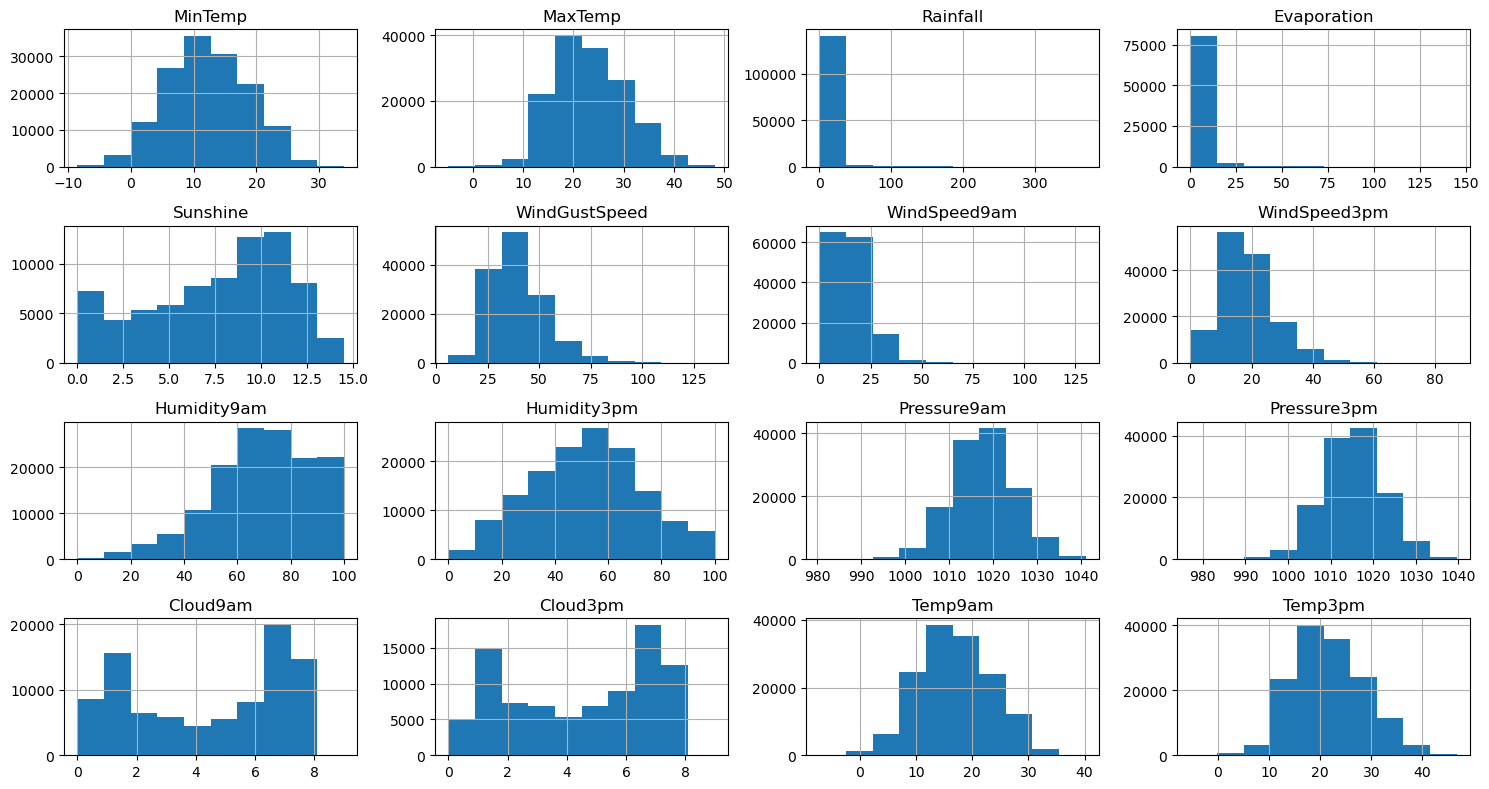

In [15]:
# plot the histogram of numeric independent variables
# the hist() function considers the numeric variables only, by default
df_feature.hist()

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()

#### 2. Distribution of categorical independent variables

For the independent categoric variables, we plot the bar plot to check the distribution of each variables.

In [16]:
# create a list of all categorical variables
# initiate an empty list to store the categorical variables
categorical = []

# use for loop to check the data type of each variable
for column in df_feature:
    
     # use 'if' statement with condition to check the categorical type 
    if is_string_dtype(df_feature[column]):
        
        # append the variables with 'categoric' data type in the list 'categorical'
        categorical.append(column)

# plot the count plot for each categorical variable 
# set the number of rows in the subplot using the parameter, 'nrows'
# set the number of columns in the subplot using the parameter, 'ncols'
# 'figsize' sets the figure size        
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (150,80))

# use for loop to plot the count plot for each variable
for variable, subplot in zip(categorical, ax.flatten()):
    
    # use countplot() to plot the graph
    # pass the axes for the plot to the parameter, 'ax'
    sns.countplot(x = df_rain[variable], ax = subplot)

# display the plot    
plt.show()

#### 3. Distribution of dependent variable.

In [17]:
# get counts of 'Yes' and 'No' in the 'target' variable using 'value_counts()'
# store the values in 'class_frequency'

class_frequency = df_target.RainTomorrow.value_counts()

class_frequency

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

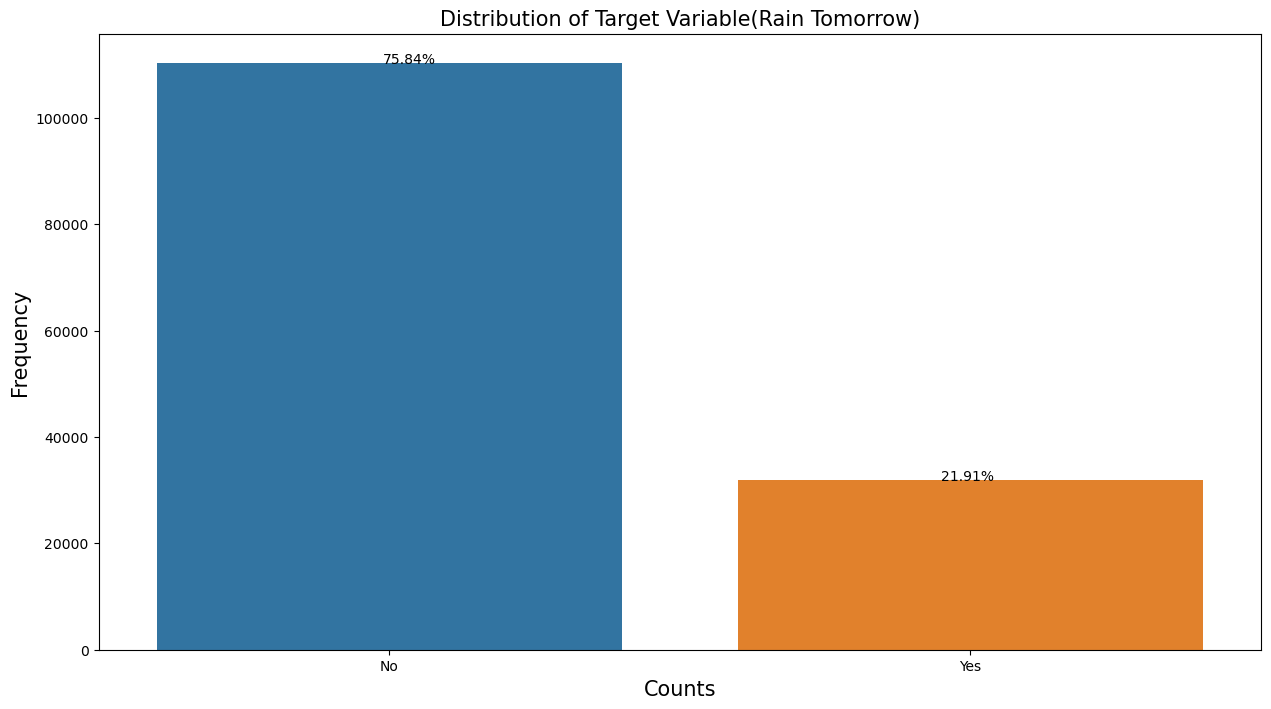

In [18]:
# plot the countplot of the variable 'RainTomorrow'
sns.countplot(x = df_target.RainTomorrow)

# use below code to print the values in the graph
# 'x' and 'y' gives position of the text
# 's' is the text on the plot
plt.text(x = -0.01, y = df_target.RainTomorrow.value_counts()[0] + 20,
        s = str(round((class_frequency[0]) * 100 / len(df_target.RainTomorrow), 2)) + '%')

plt.text(x = 0.95, y = df_target.RainTomorrow.value_counts()[1] + 10,
        s = str(round((class_frequency[1]) * 100 / len(df_target.RainTomorrow), 2)) + '%')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Distribution of Target Variable(Rain Tomorrow)', fontsize = 15)
plt.xlabel('Counts', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)

# to show the plot
plt.show()

There are a total of 142193 respondents out off which says No RainTomorrow is 110316 and says RainTomorrow is 31877. We see that the data set is imbalanced between the two classes of the target variable.

### 4.1.4 Correlation

Correlation is a statistic that measures the degree to which two variables move with each other. A correlation coefficient near 1 indicates the strong relationship between them; a weak correlation indicates the extent to which one variable increases as the other decreases. Correlation among multiple variables can be represented in the form of a matrix. This allows us to see which variables are correlated.

#### To check the correlation between numerical variables, we perform the following steps:

1. Compute a correlation matrix
2. Plot a heatmap for the correlation matrix

#### 1. Compute a correlation matrix

In [19]:
# use the corr() function to generate the correlation matrix of the numeric variables
corr = df_feature.corr()

# print the correlation matrix
corr

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.736555,0.103938,0.466993,0.072586,0.177415,0.175064,0.175173,-0.232899,0.006089,-0.450970,-0.461292,0.078754,0.021605,0.901821,0.708906
MaxTemp,0.736555,1.000000,-0.074992,0.587932,0.470156,0.067615,0.014450,0.050300,-0.504110,-0.508855,-0.332061,-0.427167,-0.289370,-0.277921,0.887210,0.984503
Rainfall,0.103938,-0.074992,1.000000,-0.064351,-0.227549,0.133659,0.087338,0.057887,0.224405,0.255755,-0.168154,-0.126534,0.198528,0.172403,0.011192,-0.079657
Evaporation,0.466993,0.587932,-0.064351,1.000000,0.365602,0.203021,0.193084,0.129400,-0.504092,-0.390243,-0.270362,-0.293581,-0.183793,-0.182618,0.545115,0.572893
Sunshine,0.072586,0.470156,-0.227549,0.365602,1.000000,-0.034750,0.005499,0.053834,-0.490819,-0.629130,0.041970,-0.019719,-0.675323,-0.703930,0.291188,0.490501
WindGustSpeed,0.177415,0.067615,0.133659,0.203021,-0.034750,1.000000,0.605303,0.686307,-0.215070,-0.026327,-0.458744,-0.413749,0.071736,0.109168,0.150150,0.032748
WindSpeed9am,0.175064,0.014450,0.087338,0.193084,0.005499,0.605303,1.000000,0.519547,-0.270858,-0.031614,-0.228743,-0.175817,0.025112,0.054639,0.128545,0.004569
WindSpeed3pm,0.175173,0.050300,0.057887,0.129400,0.053834,0.686307,0.519547,1.000000,-0.145525,0.016432,-0.296351,-0.255439,0.053337,0.025396,0.163030,0.027778
Humidity9am,-0.232899,-0.504110,0.224405,-0.504092,-0.490819,-0.215070,-0.270858,-0.145525,1.000000,0.666949,0.139442,0.186858,0.452297,0.357326,-0.471354,-0.498399
Humidity3pm,0.006089,-0.508855,0.255755,-0.390243,-0.629130,-0.026327,-0.031614,0.016432,0.666949,1.000000,-0.027544,0.051997,0.517120,0.523120,-0.221019,-0.557841


#### 2. Plot the heatmap for the diagonal correlation matrix

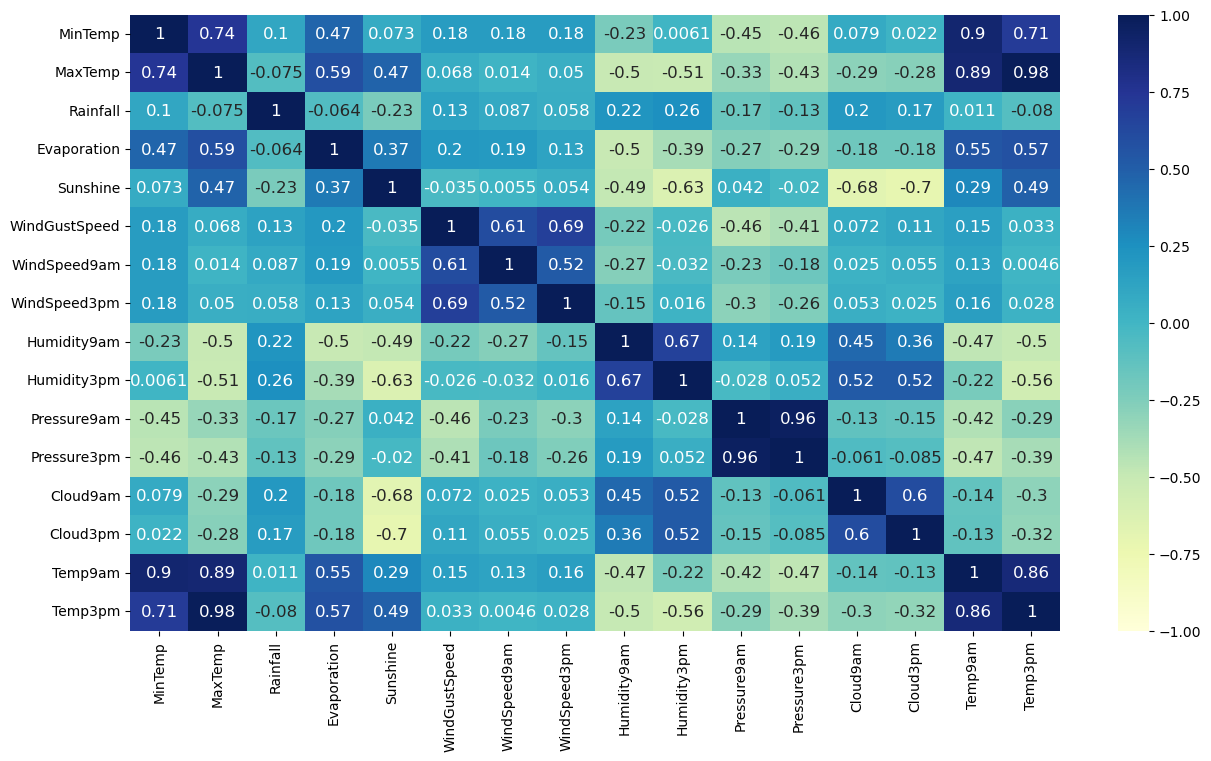

In [20]:
# plot the heat map
# corr: give the correlation matrix
# cmap: color code used for plotting
# vmax: gives a maximum range of values for the chart
# vmin: gives a minimum range of values for the chart
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# mask: mask the upper traingular matrix values
sns.heatmap(corr, annot = True, cmap = 'YlGnBu', vmax = 1.0, vmin = -1.0, annot_kws = {'size': 12})

# display the plot
plt.show()

The diagonal represents the correlation of the variable with itself thus all the diagonal entries are '1'. The dark Blue squares represent the variables with strong positive correlation.

From the above plot we can see that the highest positive correlation (= 0.98) is between the variables 'Temp3pm' and 'MaxTemp'. Also there is strong positive correlation between the pairs (Temp9am, MaxTemp), (Temp9am, MinTemp). There may be multicollinearity present.
Variable 'Cloud3pm' and 'Sunshine' has negative correlation, ('Humidity3pm'and 'Sunshine') and ('Sunshine' and 'Cloud9am') also has negative Correlation

Correlation does not imply causation. In other words, if two variables are correlated, it does not mean that one variable caused the other.

### 4.1.5 Discover Outliers

Importance of detecting an outlier
An outlier is an observation that appears to deviate distinctly from other observations in the data. If the outliers are not removed, the model accuracy may decrease.

#### To detect outliers in numeric data, we perform the following:

1. Plot the boxplot for numeric data
2. Note the variables in which outliers are present
3. Remove outliers by IQR method
4. Plot the boxplot to recheck for outliers

#### 1. Plot the boxplot for numeric data

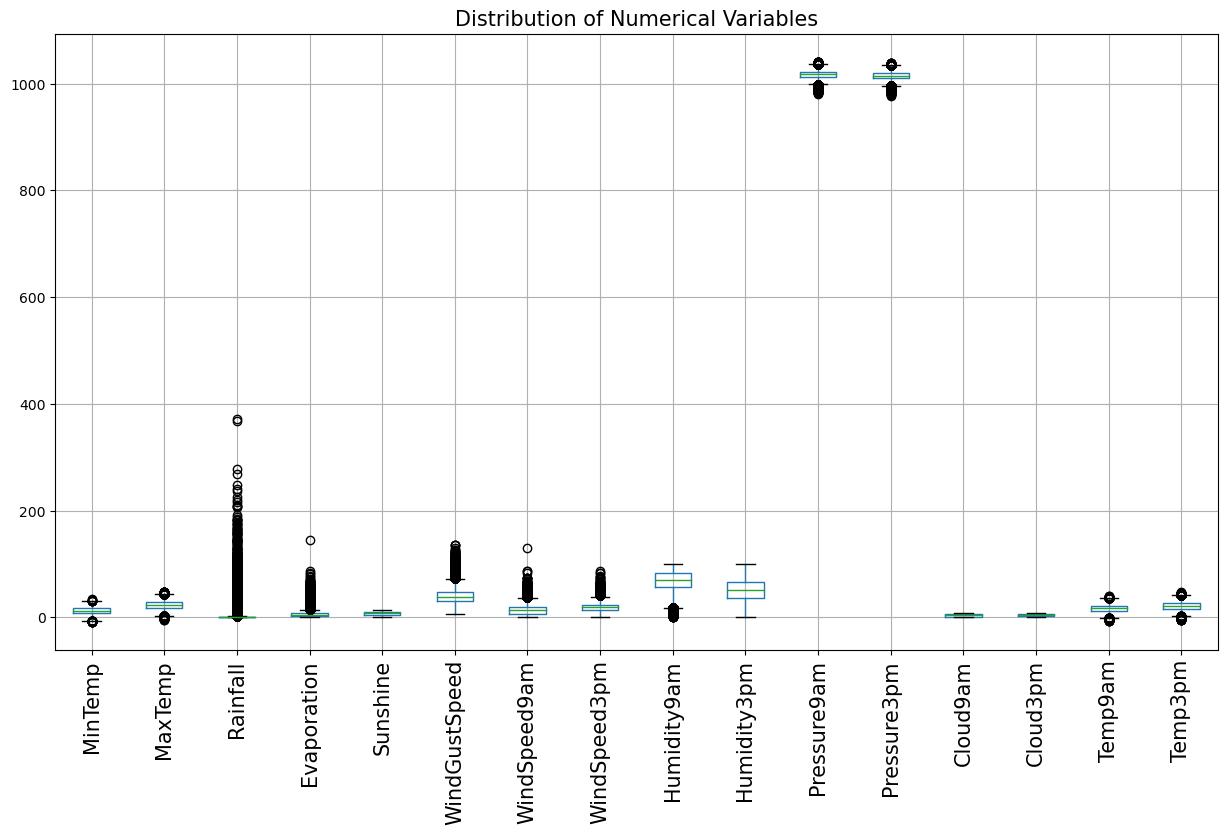

In [21]:
# plot a boxplot to visualize the outliers in all the numeric variables
df_feature.boxplot()

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of Numerical Variables', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

In [22]:
# Checking the shape of Dataframe Before Removing Outliers from Dataset
df_rain.shape

(145460, 22)

#### 2. Remove outliers by IQR method

Let us use the IQR method to remove the outliers.

In [23]:
# calculate the first quartile
Q1 = df_feature.quantile(0.25)

# calculate the third quartile
Q3 = df_feature.quantile(0.75)

# Interquartile Range (IQR) is defined as the difference between the third and first quartile
# calculate IQR
IQR = Q3 - Q1

# print the IQR
print(IQR)

MinTemp           9.3
MaxTemp          10.3
Rainfall          0.8
Evaporation       4.8
Sunshine          5.8
WindGustSpeed    17.0
WindSpeed9am     12.0
WindSpeed3pm     11.0
Humidity9am      26.0
Humidity3pm      29.0
Pressure9am       9.5
Pressure3pm       9.6
Cloud9am          6.0
Cloud3pm          5.0
Temp9am           9.3
Temp3pm           9.8
dtype: float64


In [24]:
# remove the outliers from the dataframe 'df_weather'
# retrieve the dataframe without the outliers
# '~' returns the values that do not satisfy the given conditions 
# i.e. it returns values between the range [Q1-1.5*IQR, Q3+1.5*IQR]
# '|' is used as 'OR' operator on multiple conditions   
# 'any(axis=1)' checks the entire row for atleast one 'True' entry (those rows represents outliers in the data)

df_rain = df_rain[~((df_rain < (Q1 - 1.5 * IQR)) | (df_rain > (Q3 + 1.5 * IQR))).any(axis = 1)]

# reset the index of the dataframe without outliers
df_rain = df_rain.reset_index(drop = True)

In [25]:
# check the shape of the data after removal of outliers 
df_rain.shape

(112175, 22)

The output shows a reduction in the number of rows. Thus we may say that the potential outliers have been removed.

#### 3. Plot the boxplot to recheck for outliers

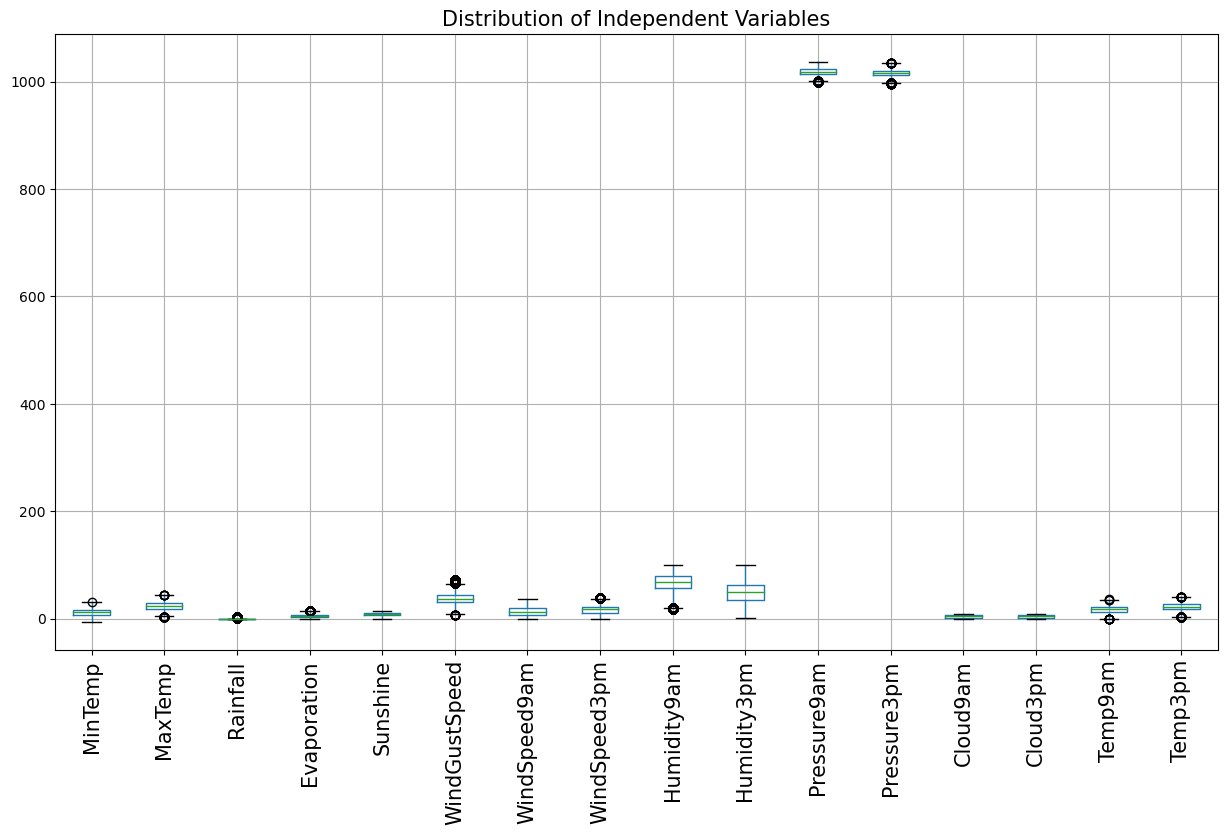

In [26]:
df_rain.boxplot()

plt.title('Distribution of Independent Variables', fontsize = 15)

plt.xticks(rotation = 'vertical', fontsize = 15)

plt.show()

Observing the range of the boxplot, we say that the outliers are removed from the original data.

It is up to the discretion of the data scientist, to remove them or not; and maybe decide after evaluating the model performance.

A crude way to know whether the outliers have been removed or not is to check the dimensions of the data. If the dimensions are reduced that implies outliers are removed.

### 4.1.6 Missing Values

First, run a check for the presence of missing values and their percentage for each column. Then choose the right approach to remove them.

In [27]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total_null = df_rain.isnull().sum().sort_values(ascending = False)

# calculate the percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent_null = (df_rain.isnull().sum() * 100 / df_rain.isnull().count()).sort_values(ascending = False)

# concat the 'Total' and 'Percent' columns using 'concat' function
# 'keys' is the list of column names
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total_null, Percent_null], axis = 1, keys = ['Total Null', 'Percentage of Missing Data'])

# add the column containing data type of each variable
missing_data['Data Type'] = df_rain[missing_data.index].dtypes

missing_data

,Total Null,Percentage of Missing Data,Data Type
Sunshine,54389,48.485848,float64
Evaporation,49007,43.687988,float64
Cloud3pm,47299,42.165367,float64
Cloud9am,44619,39.776242,float64
Pressure9am,11889,10.598618,float64
Pressure3pm,11851,10.564743,float64
WindDir9am,8980,8.005349,object
WindGustDir,7953,7.089815,object
WindGustSpeed,7914,7.055048,float64
Humidity3pm,3529,3.145977,float64


Only Location do not contain missing values

Another way to find the missing values is to plot a heatmap for visualization.

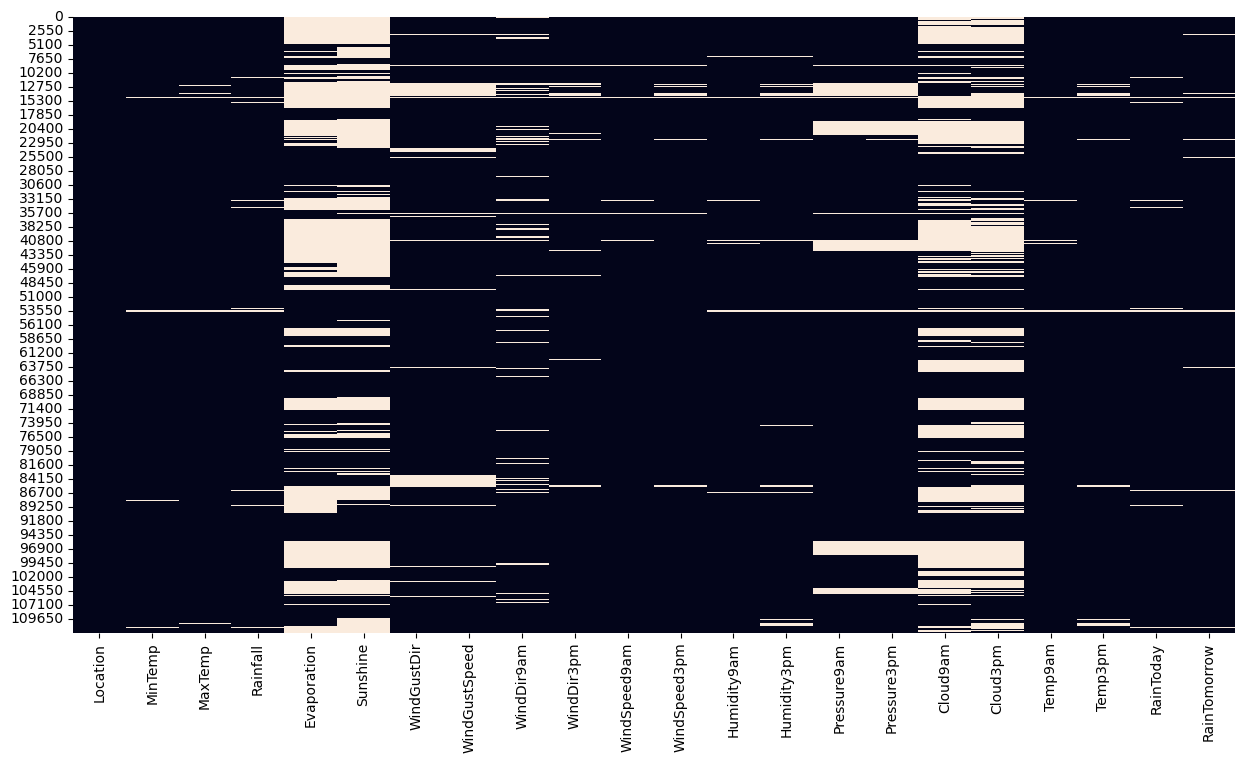

In [28]:
# plot heatmap to check null values
# 'cbar = False' does not show the color axis 

sns.heatmap(df_rain.isnull(), cbar = False)

# display the plot
plt.show()

The horizontal lines in the heatmap correspond to the missing values.

#### How to deal with missing data?

Drop data

a. Drop the whole row
b. Drop the whole column


Replace data

a. Replace it by mean

b. Replace it by frequency
c. Replace it based on other functions


Whole columns should be dropped only if most entries in the column are empty. In our dataset, column 'Sunshine' and 'Evaporation'
has more then 43% of Missing values Hence dropping these two columns

In [29]:
# Dropping the two columns that having missing values 
df_rain.drop(['Sunshine', 'Evaporation'], axis = 1, inplace = True)

In [30]:
# checking the shape of dataframe after dropping the columns
df_rain.shape

(112175, 20)

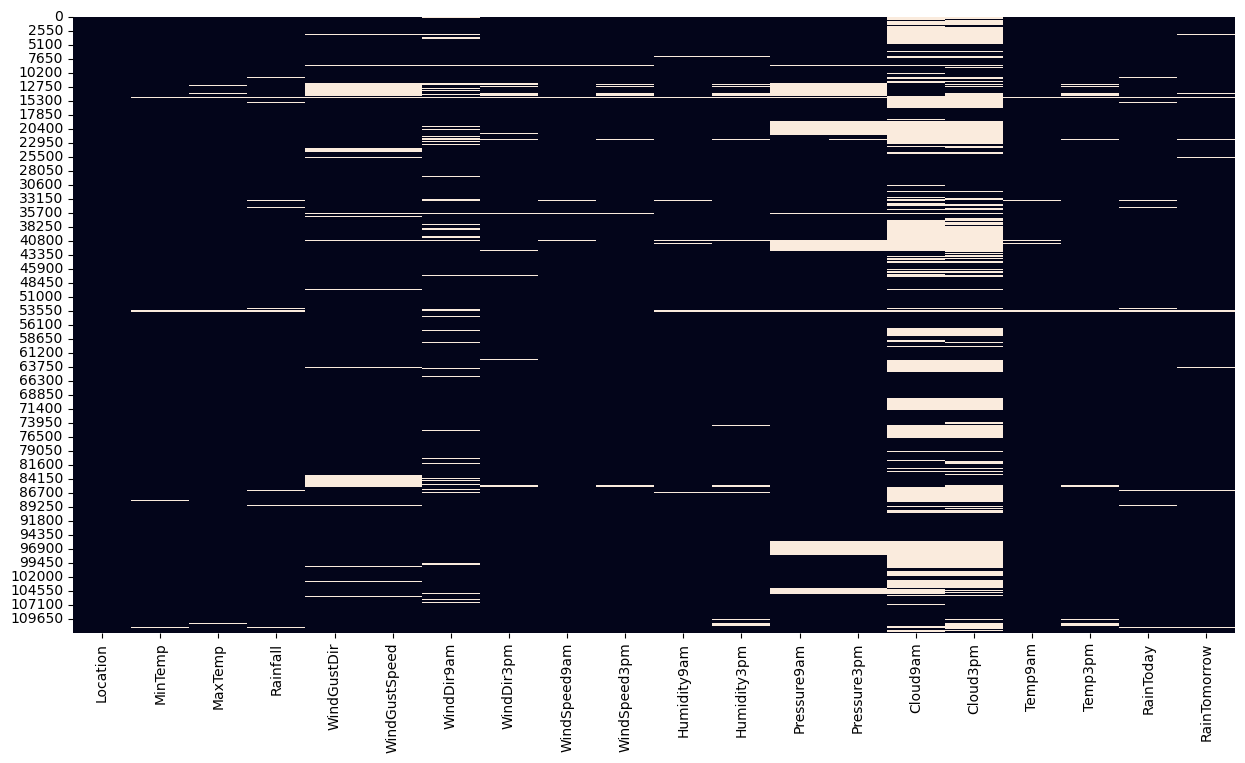

In [31]:
# plot heatmap to check null values after dropping 'Sunshine' and 'Evaporation'
# 'cbar = False' does not show the color axis 
sns.heatmap(df_rain.isnull(), cbar = False)

# display the plot
plt.show()

#### Handle the missing values for numerical variables

In [32]:
# filter out the categorical variables and consider only the numeric variables with missing values

num_missing_data = missing_data[(missing_data['Total Null'] > 0) &
                               (missing_data['Data Type'] != 'object')]

num_missing_data

,Total Null,Percentage of Missing Data,Data Type
Sunshine,54389,48.485848,float64
Evaporation,49007,43.687988,float64
Cloud3pm,47299,42.165367,float64
Cloud9am,44619,39.776242,float64
Pressure9am,11889,10.598618,float64
Pressure3pm,11851,10.564743,float64
WindGustSpeed,7914,7.055048,float64
Humidity3pm,3529,3.145977,float64
Rainfall,3024,2.695788,float64
Temp3pm,2851,2.541565,float64


For the numerical variables, we can replace the missing values by their mean, median or mode as per the requirement.

In [33]:
# according to the data definition, 'NA' denotes the absence of miscellaneous feature
# use the function fillna() to replace missing values in 'Cloud3pm' with 0 
df_rain['Cloud3pm'] = df_rain['Cloud3pm'].fillna(0)

In [34]:
# according to the data definition, 'NA' denotes the absence of miscellaneous feature
# use the function fillna() to replace missing values in 'Cloud9am' with 0 
df_rain['Cloud9am'] = df_rain['Cloud9am'].fillna(0)

In [35]:
# according to the data definition, 'NA' denotes the absence of miscellaneous feature
# use the function fillna() to replace missing values in 'Pressure9am' with 0 
df_rain['Pressure9am'] = df_rain['Pressure9am'].fillna(0)

In [36]:
# according to the data definition, 'NA' denotes the absence of miscellaneous feature
# use the function fillna() to replace missing values in 'Pressure3pm' with 0 
df_rain['Pressure3pm'] = df_rain['Pressure3pm'].fillna(0)

In [37]:
# according to the data definition, 'NA' denotes the absence of miscellaneous feature
# use the function fillna() to replace missing values in 'WindGustSpeed' with 0 
df_rain['WindGustSpeed'] = df_rain['WindGustSpeed'].fillna(0)

In [38]:
# according to the data definition, 'NA' denotes the absence of miscellaneous feature
# use the function fillna() to replace missing values in 'Humidity3pm' with 0 
df_rain['Humidity3pm'] = df_rain['Humidity3pm'].fillna(0)

In [39]:
# according to the data definition, 'NA' denotes the absence of miscellaneous feature
# use the function fillna() to replace missing values in 'Rainfall' with 0 
df_rain['Rainfall'] = df_rain['Rainfall'].fillna(0)

In [40]:
# according to the data definition, 'NA' denotes the absence of miscellaneous feature
# use the function fillna() to replace missing values in 'Temp3pm' with 0 
df_rain['Temp3pm']  = df_rain['Temp3pm'].fillna(0)

In [41]:
# according to the data definition, 'NA' denotes the absence of miscellaneous feature
# use the function fillna() to replace missing values in 'Windspeed3pm' with 0 
df_rain['WindSpeed3pm'] = df_rain['WindSpeed3pm'].fillna(0)

In [42]:
# according to the data definition, 'NA' denotes the absence of miscellaneous feature
# use the function fillna() to replace missing values in 'Humidity9am' with 0 
df_rain['Humidity9am'] = df_rain['Humidity9am'].fillna(0)

In [43]:
# according to the data definition, 'NA' denotes the absence of miscellaneous feature
# use the function fillna() to replace missing values in 'Windspeed9am' with 0 
df_rain['WindSpeed9am'] = df_rain['WindSpeed9am'].fillna(0)

In [44]:
# according to the data definition, 'NA' denotes the absence of miscellaneous feature
# use the function fillna() to replace missing values in 'Temp9am' with 0 
df_rain['Temp9am'] = df_rain['Temp9am'].fillna(0)

In [45]:
# according to the data definition, 'NA' denotes the absence of miscellaneous feature
# use the function fillna() to replace missing values in 'MaxTemp' with 0 
df_rain['MaxTemp'] = df_rain['MaxTemp'].fillna(0)

In [46]:
# according to the data definition, 'NA' denotes the absence of miscellaneous feature
# use the function fillna() to replace missing values in 'MinTemp' with 0 
df_rain['MinTemp'] = df_rain['MinTemp'].fillna(0)

#### Handle the missing values for categorical variables

In [47]:
# filter out the numerical variables and consider only the categorical variables with missing values
cat_missing_data = missing_data[(missing_data['Total Null'] > 0) &
                               (missing_data['Data Type'] == 'O')]

cat_missing_data

,Total Null,Percentage of Missing Data,Data Type
WindDir9am,8980,8.005349,object
WindGustDir,7953,7.089815,object
WindDir3pm,3349,2.985514,object
RainToday,3024,2.695788,object
RainTomorrow,2712,2.417651,object


In [48]:
# according to the data definition, 'NA' denotes the absence of miscellaneous feature
# replace NA values in 'WindDir9am' with a valid value, 'None'
df_rain['WindDir9am'] = df_rain['WindDir9am'].fillna('None')

In [49]:
# according to the data definition, 'NA' denotes the absence of miscellaneous feature
# replace NA values in 'WindGustDir' with a valid value, 'None'
df_rain['WindGustDir'] = df_rain['WindGustDir'].fillna('None')

In [50]:
# according to the data definition, 'NA' denotes the absence of miscellaneous feature
# replace NA values in 'WindDir3pm' with a valid value, 'None'
df_rain['WindDir3pm'] = df_rain['WindDir3pm'].fillna('None')

In [51]:
# according to the data definition, 'NA' denotes the absence of miscellaneous feature
# replace NA values in 'RainToday' with a valid value, 'None'
df_rain['RainToday'] = df_rain['RainToday'].fillna('No')

In [52]:
# according to the data definition, 'NA' denotes the absence of miscellaneous feature
# replace NA values in 'RainTomorrow' with a valid value, 'None'
df_rain['RainTomorrow'] = df_rain['RainTomorrow'].fillna('No')

After replacing the null values for both the variables, recheck the null values.

In [53]:
# recheck the null values
# 'isnull().sum()' returns the number of missing values in each variable
df_rain.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

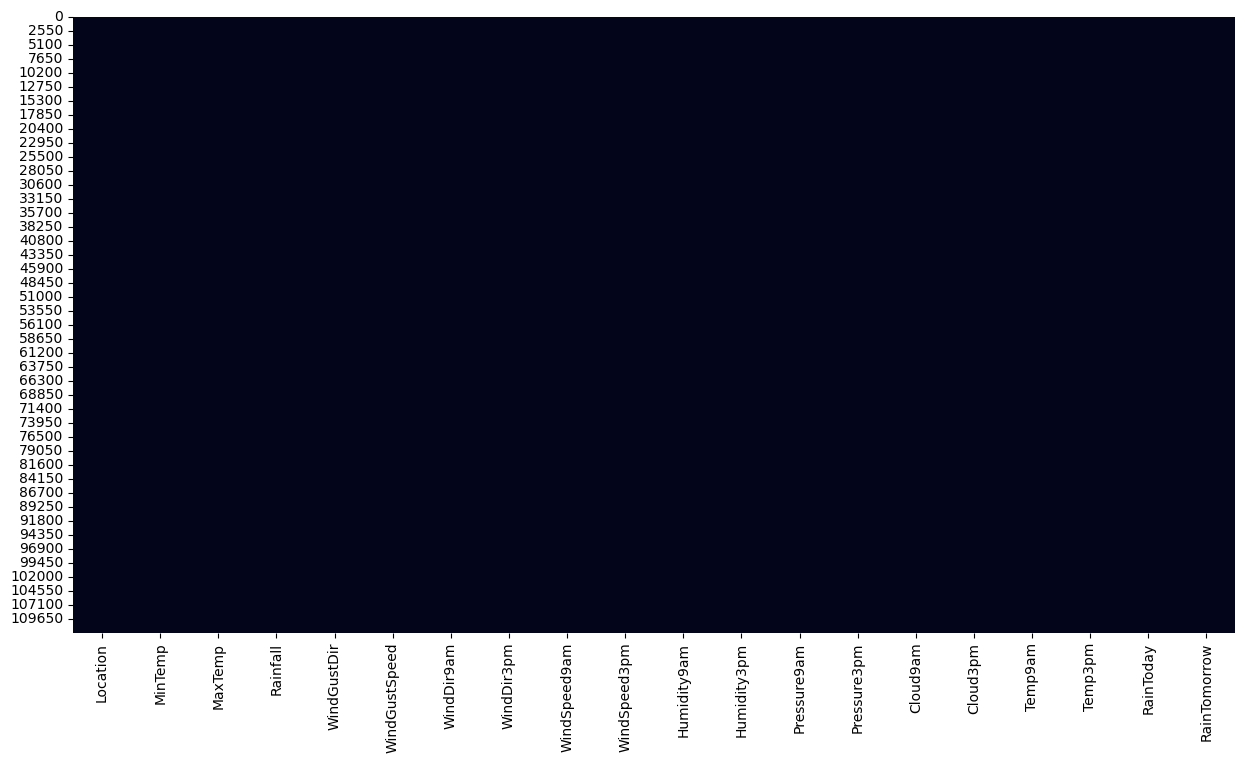

In [54]:
# recheck the null values
# # plot heatmap to check null values

sns.heatmap(df_rain.isnull(), cbar = False)

# display the plot
plt.show()

#### Create a generalized function to calculate the metrics for the test set.

In [55]:
# create a generalized function to calculate the metrics values for test set
def get_test_report(model):
    
    # return the performace measures on test set
    return(classification_report(y_test, y_pred))

#### Create a generalized function to calculate the kappa score for the test set.

In [56]:
# create a generalized function to calculate the metrics values for test set
def kappa_score(model):
    
    # return the kappa score on test set
    return(cohen_kappa_score(y_test, y_pred))
#The kappa statistic is a measure of how closely the instances classified by the machine learning
#classifier matched the data labeled as ground truth, controlling for the accuracy of a random
#classifier as measured by the expected accuracy.
#kappas > 0.75 as excellent, 0.40-0.75 as fair to good, and < 0.40 as poor.

#### Define a function to plot the confusion matrix.

In [57]:
# define a to plot a confusion matrix for the model
def plot_confusion_matrix(model):
    
    # create a confusion matrix
    # pass the actual and predicted target values to the confusion_matrix()
    cm = confusion_matrix(y_test, y_pred)

    # label the confusion matrix  
    # pass the matrix as 'data'
    # pass the required column names to the parameter, 'columns'
    # pass the required row names to the parameter, 'index'
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'],
                               index = ['Actual:0','Actual:1'])

    # plot a heatmap to visualize the confusion matrix
    # 'annot' prints the value of each grid 
    # 'fmt = d' returns the integer value in each grid
    # 'cmap' assigns color to each grid
    # as we do not require different colors for each grid in the heatmap,
    # use 'ListedColormap' to assign the specified color to the grid
    # 'cbar = False' will not return the color bar to the right side of the heatmap
    # 'linewidths' assigns the width to the line that divides each grid
    # 'annot_kws = {'size':25})' assigns the font size of the annotated text 
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']),
                cbar = False, linewidths = 0.1, annot_kws = {'size':25})

    # set the font size of x-axis ticks using 'fontsize'
    plt.xticks(fontsize = 20)

    # set the font size of y-axis ticks using 'fontsize'
    plt.yticks(fontsize = 20)

    # display the plot
    plt.show()

#### Define a function to plot the ROC curve.

In [58]:
# define a function to plot the ROC curve and print the ROC-AUC score
def plot_roc(model):
    
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    # pass the actual target values and predicted probabilities to the function
    fpr, tpr, _  = roc_curve(y_test, y_pred_prob)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC Curve for h1n1_vaccine Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    # add the AUC score to the plot
    # 'x' and 'y' gives position of the text
    # 's' is the text 
    # use round() to round-off the AUC score upto 4 digits
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))

    # plot the grid
    plt.grid(True)

#### Create a generalized function to create a dataframe containing the scores for the models

In [59]:
# create an empty dataframe to store the scores for various classification algorithms
score_card = pd.DataFrame(columns=['Model', 'AUC Score', 'Precision Score', 'Recall Score',
                                   'Accuracy Score', 'Kappa Score', 'f1-score'])

# append the result table for all performance scores
# performance measures considered for comparision are 'AUC', 'Precision', 'Recall','Accuracy',
#'Kappa Score', and 'f1-score'
# compile the required information in a user defined function 
def update_score_card(model_name):
    
    # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({'Model': model_name,
                                    'AUC Score' : roc_auc_score(y_test, y_pred_prob),
                                    'Precision Score': metrics.precision_score(y_test, y_pred),
                                    'Recall Score': metrics.recall_score(y_test, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'Kappa Score': cohen_kappa_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred)}, 
                                    ignore_index = True)
    return(score_card)

## 4.2 Prepare the Data

To build the classification models, we need to encode the categorical variables using dummy encoding.

#### To dummy encode, we do the following:

1. Filter numerical and categorical variables
2. Dummy encode the categorical variables
3. Concatenate numerical and dummy encoded categorical variables

In [60]:
# Checking the dtypes of variables 
df_rain.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

### Label Encoding the Target Variable

Converting target categorical variable into numeric

In [61]:
# replace 'yes' with one
df_rain['RainTomorrow'] = df_rain['RainTomorrow'].replace('Yes', 1)

# replace 'no' with zero
df_rain['RainTomorrow'] = df_rain['RainTomorrow'].replace('No', 0)

#### 1. Filter categorical variables

In [62]:
# create a list of all categorical variables
# initiate an empty list to store the categorical variables
categorical = []

# use for loop to check the data type of each variable
for column in df_rain:
    
     # use 'if' statement with condition to check the categorical type 
    if is_string_dtype(df_rain[column]):
        
          # append the variables with 'categoric' data type in the list 'categorical'
        categorical.append(column)

In [63]:
# dataframe with categorical features
# 'categorical' contains a list of categorical variables
df_cat = df_rain[categorical]

# display first five observations of the categorical dataframe
df_cat.head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
0,Albury,W,W,WNW,No
1,Albury,WNW,NNW,WSW,No
2,Albury,WSW,W,WSW,No
3,Albury,NE,SE,E,No
4,Albury,W,ENE,NW,No


#### 2. Filter numerical variables

In [64]:
# dataframe with numerical features
# use 'drop()' to drop the categorical variables
# 'axis = 1' drops the corresponding column(s)
df_num = df_rain.drop(categorical, axis = 1)

# display first five observations of the numeric dataframe
df_num.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,0.0,0.0,17.2,24.3,0
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,0.0,2.0,21.0,23.2,0
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,0.0,18.1,26.5,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0


#### 3. Dummy encode the categorical variables

In [65]:
# use 'get_dummies()' from pandas to create dummy variables
# use 'drop_first = True' to create (n-1) dummy variables
df_cat_dummies = pd.get_dummies(df_cat, drop_first = True)

# display first five observations of the dummy dataframe
df_cat_dummies.head()

,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_None,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_None,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_None,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


#### 4. Concatenate numerical and dummy encoded categorical variables

In [66]:
# concat the dummy variables with numeric features to create a dataframe of all independent variables
# 'axis=1' concats the dataframes along columns 
df_rain_dummy = pd.concat([df_num, df_cat_dummies], axis = 1)

# display first five observations of the dummy dataframe
df_rain_dummy.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_None,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_None,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_None,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,0.0,0.0,17.2,24.3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,0.0,2.0,21.0,23.2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,0.0,18.1,26.5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


After removal of outliers and missing values in the data, the dataframe df_weather_dummy contains independent as well as dependent variables.

# 5. Logistic Regression

Logistic regression is one of the techniques used for classification. The estimates of the parameters are obtained by maximizing the likelihood function

## 5.1 Logistic Regression (using MLE)

#### To build the logistic model using Statsmodel, we do the following:

1. Introduce the intercept term
2. Split the data into training and test sets
3. Build the model
4. Do predictions on the test set
5. Compute accuracy measures
6. Tabulate the results

In [67]:
# use 'drop()' to remove the variable 'RainTomorrow' from df_target_dummy
# 'axis = 1' drops the corresponding column(s)
x = df_rain_dummy.drop('RainTomorrow', axis = 1)

In [68]:
# select only the target variable 'RainTomorrow'
y = df_rain_dummy['RainTomorrow']

In [69]:
# check the first five observations of X
x.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_None,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_None,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_None,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,0.0,0.0,17.2,24.3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,0.0,2.0,21.0,23.2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,0.0,18.1,26.5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [70]:
# check the first five observations of y
y.head()

0    0
1    0
2    0
3    0
4    0
Name: RainTomorrow, dtype: int64

#### 1. Introduce the intercept term

Statmodels logistic regression function (Logit) does not include the intercept term by default. Thus, we add the intercept column in the dataframe including features.

In [71]:
# add the intercept column using 'add_constant()
x = sm.add_constant(x)

# print the first five oservations after adding intercept
x.head()

,const,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_None,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_None,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_None,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes
0,1.0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1.0,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,0.0,0.0,17.2,24.3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1.0,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,0.0,2.0,21.0,23.2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1.0,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,0.0,18.1,26.5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


#### 2. Split the dataset into train and test sets

In [72]:
# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 10)

# check the dimensions of the train & test subset using 'shape'
print('X_train', x_train.shape)
print('X_test', x_test.shape)
print('Y_train', y_train.shape)
print('Y_test', y_test.shape)

X_train (89740, 112)
X_test (22435, 112)
Y_train (89740,)
Y_test (22435,)


#### 3. Build a logistic regression model using statsmodels Logit().

In [73]:
# build the model on train data (X_train and y_train)
# use fit() to fit the logistic regression model
log_reg_model = sm.Logit(y_train, x_train).fit()

# print the summary of the model
print(log_reg_model.summary())

Optimization terminated successfully.
         Current function value: 0.328596
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           RainTomorrow   No. Observations:                89740
Model:                          Logit   Df Residuals:                    89628
Method:                           MLE   Df Model:                          111
Date:                Tue, 02 Jan 2024   Pseudo R-squ.:                  0.2445
Time:                        16:52:42   Log-Likelihood:                -29488.
converged:                       True   LL-Null:                       -39030.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -6.5923      0.173    -37.996      0.000      -6.

#### 4. Do predictions on the test set

In [74]:
# let 'y_pred_prob' be the predicted values of y
y_pred_prob = log_reg_model.predict(x_test)

# print the y_pred_prob
y_pred_prob.head()

7523     0.075826
46160    0.027414
21889    0.067316
13826    0.058377
56617    0.012407
dtype: float64

Since the target variable can take only two values either 0 or 1. We decide the threshold of 0.5. If y_pred_prob is less than 0.5, then consider it to be 0 else consider it to be 1.

We have seen that the dataset is not balanced. We may check model performance parameters for different threshold values to classify as 0 and 1. As an exercise check the impact on performance parameters for different threshold values.

In [75]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred = ['0' if x < 0.5 else '1' for x in y_pred_prob]

In [76]:
# convert the predicted values to type 'float32'
y_pred = np.array(y_pred, dtype = np.float32)

# print the first five predictions
y_pred[0:5]

array([0., 0., 0., 0., 0.], dtype=float32)

#### 5. Calculate the performance measures.

#### Build a confusion matrix.

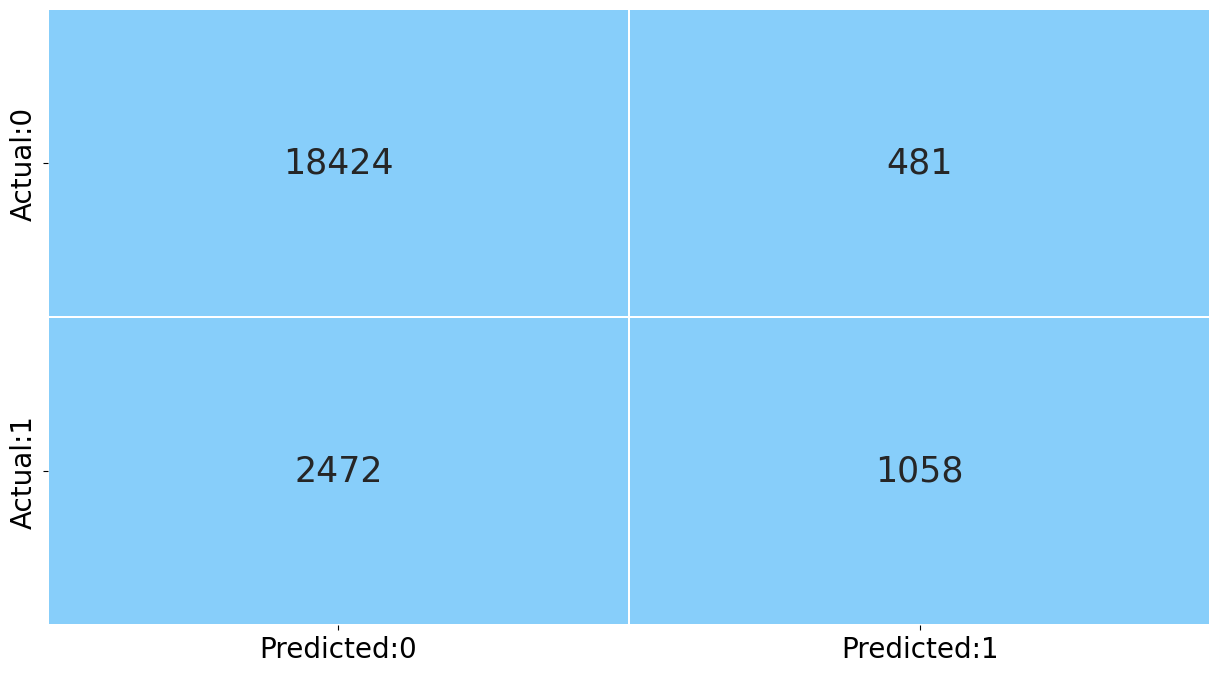

In [77]:
# call the function to plot the confusion matrix
# pass the logistic regression model to the function
plot_confusion_matrix(log_reg_model)

#### Calculate performance measures on the test set.

In [78]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the logstic regression model to the function
test_report = get_test_report(log_reg_model)

# print the performace measures
print(test_report)

              precision    recall  f1-score   support

           0       0.88      0.97      0.93     18905
           1       0.69      0.30      0.42      3530

    accuracy                           0.87     22435
   macro avg       0.78      0.64      0.67     22435
weighted avg       0.85      0.87      0.85     22435



#### Interpretation: The accuracy is 87% for this model. Also, there is significant difference between specificity and sensitivity.

In [79]:
# compute kappa score on test set
# call the function 'kappa_score'
# pass the logstic regression model to the function
kappa_value = kappa_score(log_reg_model)

# print the kappa value
print(kappa_value)

0.35590071426366576


Cohen’s kappa statistic measures interrater reliability (sometimes called interobserver agreement). Interrater reliability, or precision, happens when your data raters (or collectors) give the same score to the same data item. The kappa score can range between 0 -1, where.

0 = agreement equivalent to chance. 0.1 – 0.20 = slight agreement. 0.21 – 0.40 = fair agreement. 0.41 – 0.60 = moderate agreement. 0.61 – 0.80 = substantial agreement. 0.81 – 0.99 = near perfect agreement 1 = perfect agreement.

#### Interpretation: As the kappa score for the logistic regression is 0.3559, we can say that there is low to moderate agreement between the actual and predicted values.

#### Plot the ROC curve.

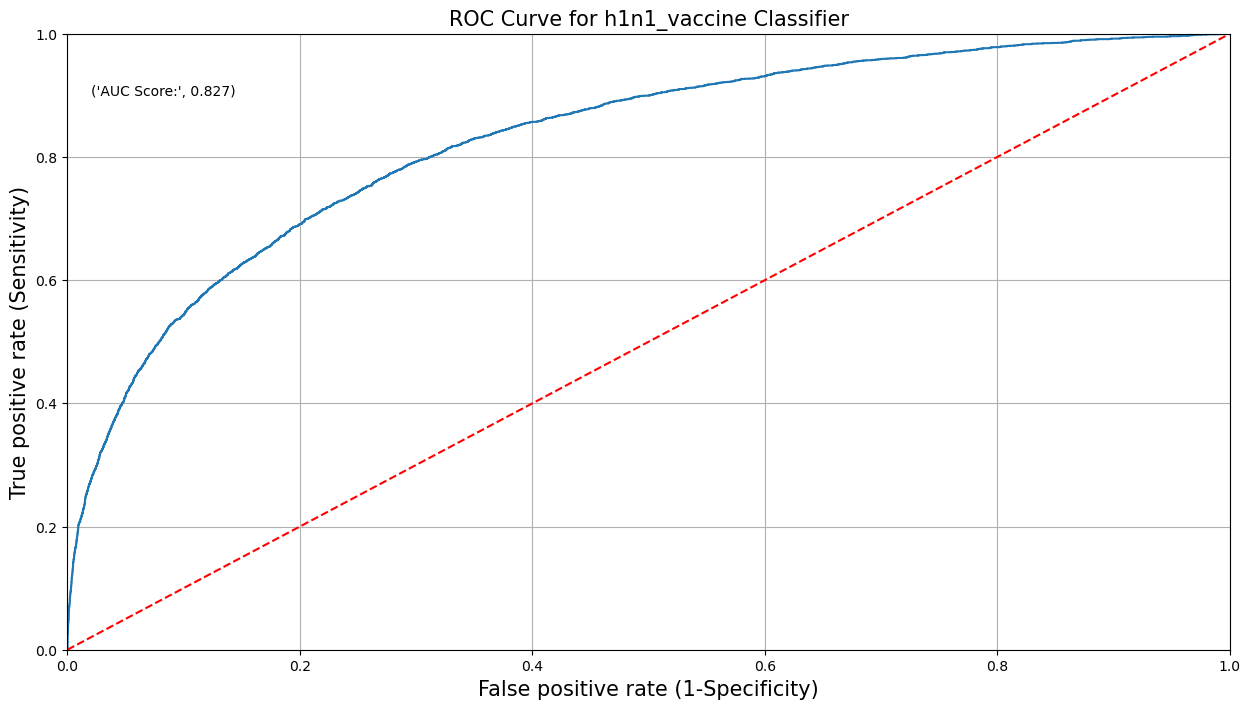

In [80]:
# call the function 'plot_roc' to plot the ROC curve
# pass the logstic regression model to the function
plot_roc(log_reg_model)

The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

We see our classifier (logistic regression) to be away from the dotted line with the AUC score 0.827.

#### 6. Tabulate the results.

Now, we tabulate the results, so that is easy for us to compare the models built.

In [81]:
# use the function 'update_score_card' to store the performance measures
# pass the 'Logistic Regression (MLE)' as model name to the function
update_score_card(model_name = 'Logistic Regression (MLE)')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression (MLE),0.827031,0.687459,0.299717,0.868375,0.355901,0.417439


The performance of the models were evaluated using AUC score, accuracy, precision, f1-score, recall, and kappa score

## 5.2 Logistic Regression (using SGD)

#### To build the logistic model on scaled features using SGD from sklearn, we do the following:

1. Scale the data
2. Split the data into training and test sets
3. Build the model
4. Do predictions on the test set
5. Compute accuracy measures
6. Tabulate the results

In [82]:
# dataframe with categorical features
# 'categorical' contains a list of categorical variables
df_cat = df_rain[categorical]

# display first five observations of the categorical dataframe
df_cat.head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
0,Albury,W,W,WNW,No
1,Albury,WNW,NNW,WSW,No
2,Albury,WSW,W,WSW,No
3,Albury,NE,SE,E,No
4,Albury,W,ENE,NW,No


In [83]:
# dataframe with numerical features
# use 'drop()' to drop the categorical variables
# 'axis = 1' drops the corresponding column(s)
df_num = df_rain.drop(categorical, axis = 1)

# display first five observations of the numeric dataframe
df_num.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,0.0,0.0,17.2,24.3,0
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,0.0,2.0,21.0,23.2,0
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,0.0,18.1,26.5,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0


In [84]:
# use 'get_dummies()' from pandas to create dummy variables
# use 'drop_first = True' to create (n-1) dummy variables
df_cat_dummies = pd.get_dummies(df_cat, drop_first = True)

# display first five observations of the dummy dataframe
df_cat_dummies.head()

,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_None,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_None,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_None,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [85]:
df_rain_dummy = pd.concat([df_num, df_cat_dummies], axis = 1)
df_rain_dummy.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_None,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_None,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_None,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,0.0,0.0,17.2,24.3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,0.0,2.0,21.0,23.2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,0.0,18.1,26.5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


#### 1. Scale the data features

In [86]:
scale = StandardScaler()

scale.fit(df_rain_dummy)

StandardScaler()

#### Split the data into Independent and Target variable

In [87]:
# use 'drop()' to remove the variable 'RainTomorrow' from df_target_dummy
# 'axis = 1' drops the corresponding column(s)
x = df_rain_dummy.drop('RainTomorrow', axis = 1)

In [88]:
# select only the target variable 'RainTomorrow'
y = df_rain_dummy['RainTomorrow']

In [89]:
x = sm.add_constant(x)

In [90]:
# check the first five observations of X
x.head()

,const,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_None,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_None,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_None,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes
0,1.0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1.0,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,0.0,0.0,17.2,24.3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1.0,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,0.0,2.0,21.0,23.2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1.0,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,0.0,18.1,26.5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [91]:
# check the first five observations of y
y.head()

0    0
1    0
2    0
3    0
4    0
Name: RainTomorrow, dtype: int64

#### 2. Split the dataset into train and test sets

In [92]:
# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 10)

# check the dimensions of the train & test subset using 'shape'
print('X_train', x_train.shape)
print('X_test', x_test.shape)
print('Y_train', y_train.shape)
print('Y_test', y_test.shape)

X_train (89740, 112)
X_test (22435, 112)
Y_train (89740,)
Y_test (22435,)


#### 3. Build the model

In [93]:
# instantiate the 'SGDClassifier' to build model using SGD
# to perform logistic regression, consider the log-loss function 
# set 'random_state' to generate the same dataset each time you run the code 
SGD = SGDClassifier(loss = 'log', random_state = 10)

# The 'log' loss gives logistic regression, a probabilistic  
# fit the model on scaled training data
logreg_with_SGD = SGD.fit(x_train, y_train)

#### 4. Do predictions on the test set

In [94]:
# predict probabilities on the test set
# consider the probability of positive class by subsetting with '[:,1]'
y_pred_prob = logreg_with_SGD.predict_proba(x_test)[:,1]

In [95]:
# use predict() to predict the class labels of target variable
y_pred = logreg_with_SGD.predict(x_test)

#### 5. Compute accuracy measures

#### Build a confusion matrix

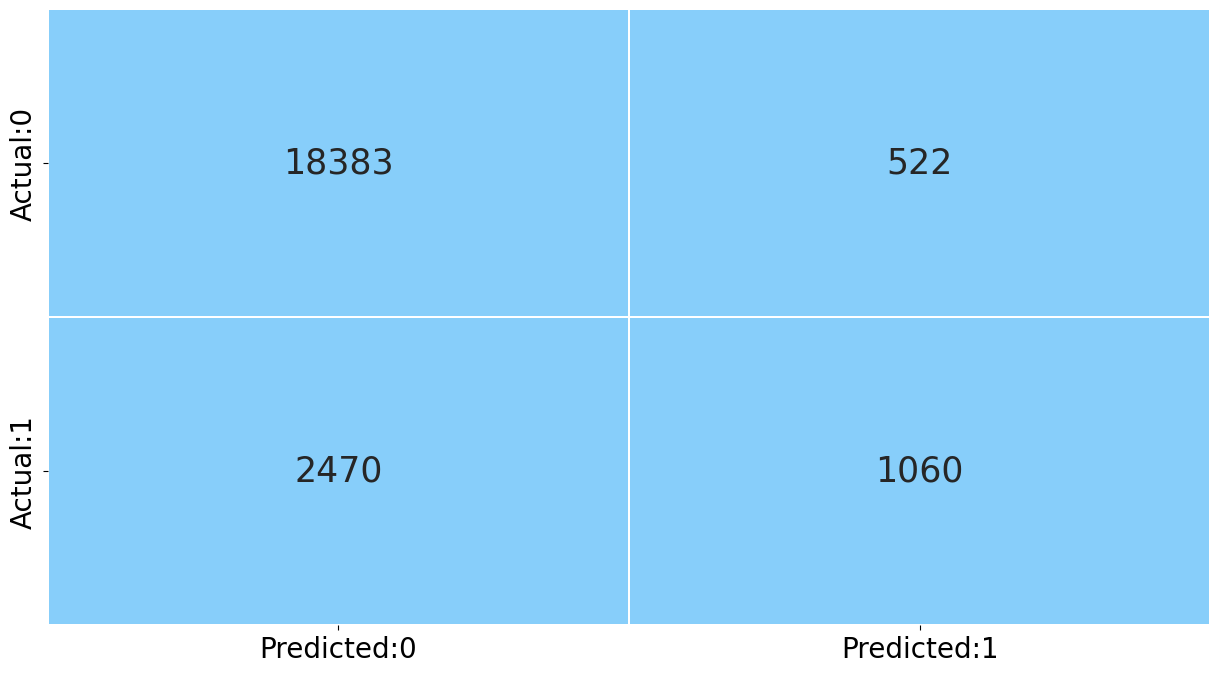

In [96]:
# call the function to plot the confusion matrix
# pass the logistic regression (SGD) model to the function
plot_confusion_matrix(logreg_with_SGD)

#### Calculate performance measures on the test set.

In [97]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the logstic regression (SGD) model to the function
test_report = get_test_report(logreg_with_SGD)

# print the performace measures
print(test_report)

              precision    recall  f1-score   support

           0       0.88      0.97      0.92     18905
           1       0.67      0.30      0.41      3530

    accuracy                           0.87     22435
   macro avg       0.78      0.64      0.67     22435
weighted avg       0.85      0.87      0.84     22435



#### Interpretation: The accuracy is 87% for this model. Also, there is significant difference between specificity and sensitivity.

In [98]:
# compute kappa score on test set
# call the function 'kappa_score'
# pass the logstic regression (SGD) model to the function
kappa_value = kappa_score(logreg_with_SGD)

# print the kappa value
print(kappa_value)

0.3515620351085986


#### Interpretation: As the kappa score for the logistic regression (SGD) is 0.35156, we can say that there is low to moderate agreement between the actual and predicted values.

#### Plot the ROC curve.

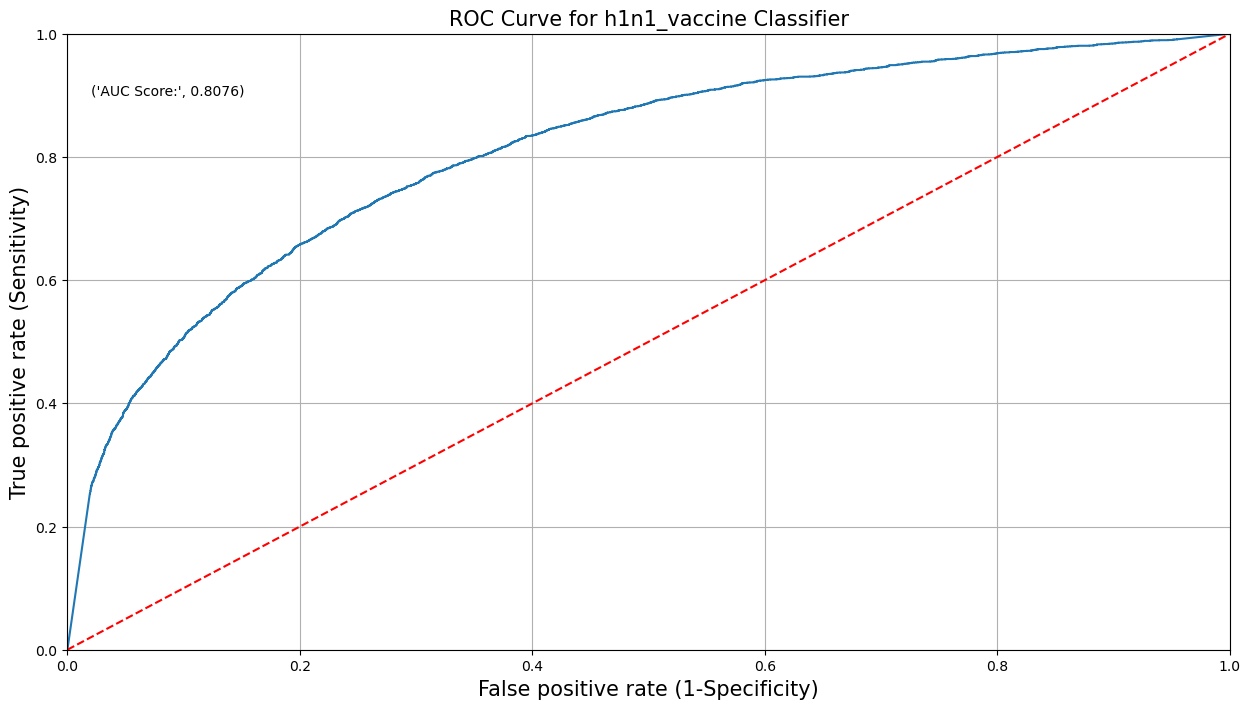

In [99]:
# call the function 'plot_roc' to plot the ROC curve
# pass the logstic regression (SGD) model to the function
plot_roc(logreg_with_SGD)

The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

We see our classifier (logistic regression with SGD) to be away from the dotted line with the AUC score 0.8076.

#### 6. Tabulate the results

In [100]:
# use the function 'update_score_card' to store the performance measures
# pass the 'Logistic Regression (SGD)' as model name to the function
update_score_card(model_name = 'Logistic Regression (SGD)')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression (MLE),0.827031,0.687459,0.299717,0.868375,0.355901,0.417439
1,Logistic Regression (SGD),0.807626,0.670038,0.300283,0.866637,0.351562,0.414710


## 5.3 Logistic Regression

#### To build the logistic model  using Logistic Regression from sklearn, we do the following:

1. Split the data into training and test sets
2. Build the model
3. Do predictions on the test set
4. Compute accuracy measures
5. Tabulate the results

#### 1. Split the data into training and test sets

In [101]:
# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 10)

# check the dimensions of the train & test subset using 'shape'
print('X_train', x_train.shape)
print('X_test', x_test.shape)
print('Y_train', y_train.shape)
print('Y_test', y_test.shape)

X_train (89740, 112)
X_test (22435, 112)
Y_train (89740,)
Y_test (22435,)


#### 2. Build the model

In [102]:
# instantiate the 'LogisticRegression' to build model using log_reg_mode
log_reg_mod = LogisticRegression()

# fit the model on  training data
log_reg_mod.fit(x_train, y_train)

LogisticRegression()

#### 3. Do predictions on the test set

In [103]:
# predict probabilities on the test set
# consider the probability of positive class by subsetting with '[:,1]'
y_pred_prob = log_reg_mod.predict_proba(x_test)[:,1]

In [104]:
# use predict() to predict the class labels of target variable
y_pred = log_reg_mod.predict(x_test)

#### 4. Compute accuracy measures

#### Build a confusion matrix.

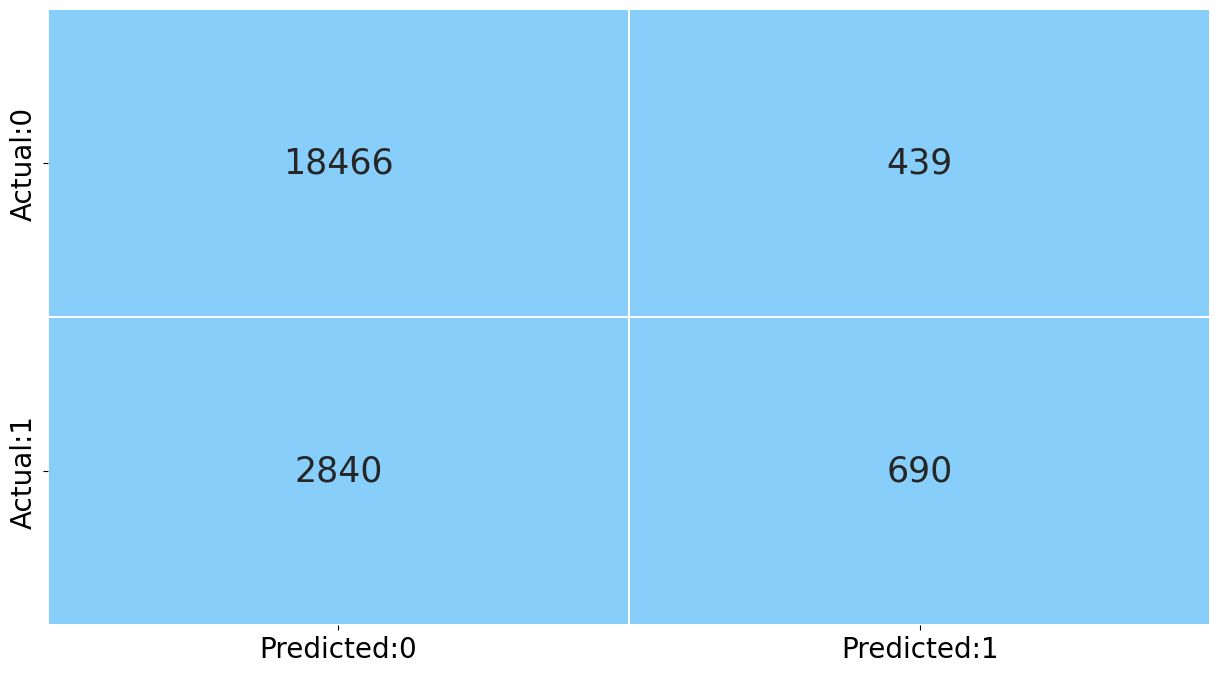

In [105]:
# call the function to plot the confusion matrix
# pass the logistic regression (log_reg_mod) model to the function
plot_confusion_matrix(log_reg_mod)

#### Calculate performance measures on the test set.

In [106]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the logstic regression (log_reg_mod) model to the function
test_report = get_test_report(log_reg_mod)

# print the performace measures
print(test_report)

              precision    recall  f1-score   support

           0       0.87      0.98      0.92     18905
           1       0.61      0.20      0.30      3530

    accuracy                           0.85     22435
   macro avg       0.74      0.59      0.61     22435
weighted avg       0.83      0.85      0.82     22435



#### Interpretation: The accuracy is 85% for this model. Also, there is significant difference between specificity and sensitivity.

In [107]:
# compute kappa score on test set
# call the function 'kappa_score'
# pass the logstic regression (log_reg_mod) model to the function
kappa_value = kappa_score(log_reg_mod)

# print the kappa value
print(kappa_value)

0.2381007297217591


Interpretation: As the kappa score for the logistic regression is 0.2381, we can say that there is low to moderate agreement between the actual and predicted values

#### Plot the ROC curve.

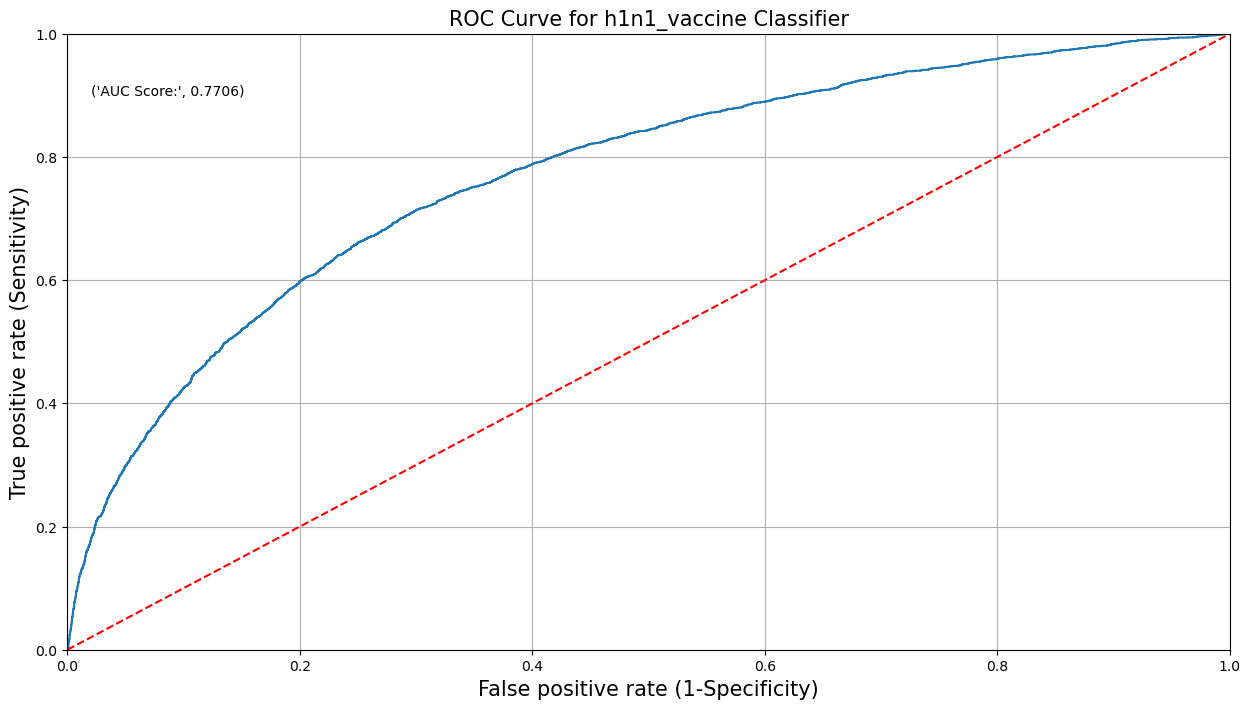

In [108]:
#call the function 'plot_roc' to plot the ROC curve
# pass the logstic regression (log_reg_model) model to the function
plot_roc(log_reg_mod)

The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

We see our classifier (logistic regression) to be away from the dotted line with the AUC score 0.7706

#### 5. Tabulate the results

In [109]:
# use the function 'update_score_card' to store the performance measures
# pass the 'Logistic Regression' as model name to the function
update_score_card(model_name = 'Logistic Regression')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression (MLE),0.827031,0.687459,0.299717,0.868375,0.355901,0.417439
1,Logistic Regression (SGD),0.807626,0.670038,0.300283,0.866637,0.351562,0.414710
2,Logistic Regression,0.770602,0.611160,0.195467,0.853844,0.238101,0.296201


The above plot shows that the Logistic Regression model has lower values for Recall Score, Kappa score and F1-score when compared to the Logistic Regression model(MLE) and Logistic Regression model(SGD) built initially. All the other performance measures are similar for both the models. Finally, it can be concluded that the Logistic Regression model(MLE) can be used to predict Rain in Australia

The Classifiaction Model is Predicted using Logistic Regression and Decision Tree, Various Methods have been used to Predict model such as Logistic Regression using MLE, Logistic Regression and SGD Classifier which is Optimization Technique use to improve model Performance. Logit is used to test the statistical significance of the model parameters from the summary table and it will not works for singular matrix but the Logistic Regression works well for singular case also, so both works in different approaches to estimate the model parameters

# 6. Decision Tree

Decision Tree is a non-parametric supervised learning method. It builds a regression model in the form of a tree structure. It breaks down a data set into smaller and smaller subsets, which is called splitting. The final result is a tree with a decision and leaf nodes. A decision node has two or more branches. The leaf node represents a class or decision. The topmost decision node in a tree that corresponds to the best predictor called 'root node'. The decision tree is built using different criteria like gini index, and entropy.

## 6.1 Decision Tree

#### To build a Decision Tree, we do the following:

1. Split the data into training and test sets
2. Build the model
3. Plot the decision tree
4. Do predictions on the test set
5. Compute accuracy measures
6. Tabulate the results

In [110]:
# dataframe with categorical features
# 'categorical' contains a list of categorical variables
df_cat = df_rain[categorical]

# display first five observations of the categorical dataframe
df_cat.head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
0,Albury,W,W,WNW,No
1,Albury,WNW,NNW,WSW,No
2,Albury,WSW,W,WSW,No
3,Albury,NE,SE,E,No
4,Albury,W,ENE,NW,No


In [111]:
# dataframe with numerical features
# use 'drop()' to drop the categorical variables
# 'axis = 1' drops the corresponding column(s)
df_num = df_rain.drop(categorical, axis = 1)

# display first five observations of the numeric dataframe
df_num.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,0.0,0.0,17.2,24.3,0
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,0.0,2.0,21.0,23.2,0
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,0.0,18.1,26.5,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0


In [112]:
# use 'get_dummies()' from pandas to create dummy variables
# use 'drop_first = True' to create (n-1) dummy variables
df_cat_dummies = pd.get_dummies(df_cat, drop_first = True)

# display first five observations of the dummy dataframe
df_cat_dummies.head()

,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_None,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_None,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_None,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [113]:
df_rain_dummy = pd.concat([df_num, df_cat_dummies], axis = 1)
df_rain_dummy.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_None,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_None,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_None,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,0.0,0.0,17.2,24.3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,0.0,2.0,21.0,23.2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,0.0,18.1,26.5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [114]:
# use 'drop()' to remove the variable 'RainTomorrow' from df_target_dummy
# 'axis = 1' drops the corresponding column(s)
x = df_rain_dummy.drop('RainTomorrow', axis = 1)

In [115]:
# select only the target variable 'RainTomorrow'
y = df_rain_dummy['RainTomorrow']

In [116]:
# print the first five oservations of Independent Variables
x.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_None,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_None,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_None,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,0.0,0.0,17.2,24.3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,0.0,2.0,21.0,23.2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,0.0,18.1,26.5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


#### 1. Split the data into training and test sets

In [117]:
# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 10)

# check the dimensions of the train & test subset using 'shape'
print('X_train', x_train.shape)
print('X_test', x_test.shape)
print('Y_train', y_train.shape)
print('Y_test', y_test.shape)

X_train (89740, 111)
X_test (22435, 111)
Y_train (89740,)
Y_test (22435,)


#### 2. Build the model

To build the decision tree, we used the criterion of 'entropy'. Entropy is one of the criteria used to build the decision tree. It calculates the homogeneity of the sample. The entropy is zero if the sample is completely homogeneous, and it is equal to 1 if the sample is equally divided.

We build the decision tree on the unscaled features.

In [118]:
# instantiate the 'DecisionTreeClassifier' object using 'entropy' criterion
# pass the 'random_state' to obtain the same samples for each time you run the code
decision_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)

# fit the model using fit() on train data
decision_tree_mod = decision_tree.fit(x_train, y_train)

#### 3. Do predictions on the test set

In [119]:
# predict probabilities on the test set
# consider the probability of positive class by subsetting with '[:,1]'
y_pred_prob = decision_tree_mod.predict_proba(x_test)[:, 1]

y_pred_prob

array([0., 0., 0., ..., 0., 0., 0.])

In [120]:
# predict the class labels using 'X_test'
y_pred = decision_tree_mod.predict(x_test)

y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [121]:
# lables = x_train.columns

# fig = plt.figure(figsize = (30,30))

# _ = tree.plot_tree(decision_tree_mod, feature_names = lables, class_names = ['0', '1'], filled = True)

#### 4. Compute accuracy measures

#### Build a confusion matrix

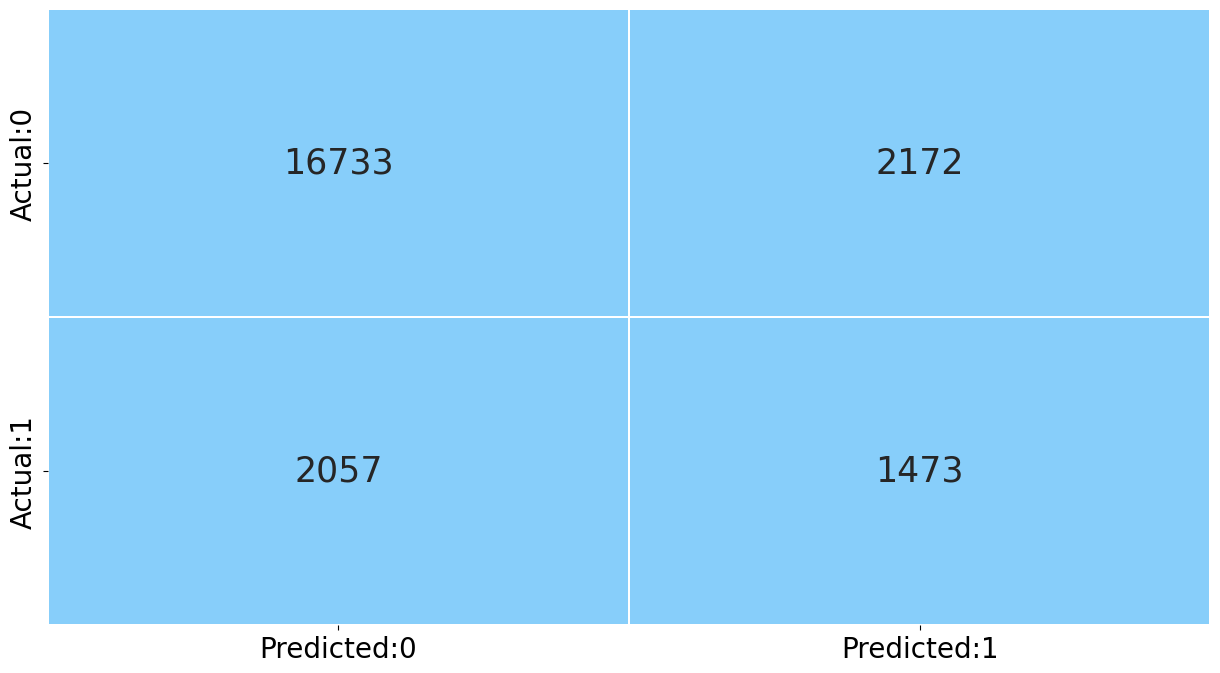

In [122]:
# call the function to plot the confusion matrix
# pass the decision tree model to the function
plot_confusion_matrix(decision_tree_mod)

#### Calculate performance measures on the test set

In [123]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the decision tree model to the function
test_report = get_test_report(decision_tree_mod)

# print the performace measures
print(test_report)

              precision    recall  f1-score   support

           0       0.89      0.89      0.89     18905
           1       0.40      0.42      0.41      3530

    accuracy                           0.81     22435
   macro avg       0.65      0.65      0.65     22435
weighted avg       0.81      0.81      0.81     22435



#### Interpretation: The accuracy is 81% for this model.

In [124]:
# compute kappa score on test set
# call the function 'kappa_score'
# pass the decision tree model to the function
kappa_value = kappa_score(decision_tree_mod)

# print the kappa value
print(kappa_value)

0.29843669383678373


#### Interpretation: As the kappa score for the Decision Tree is 0.2984, we can say that there is low to moderate agreement between the actual and predicted values.

#### Plot the ROC curve

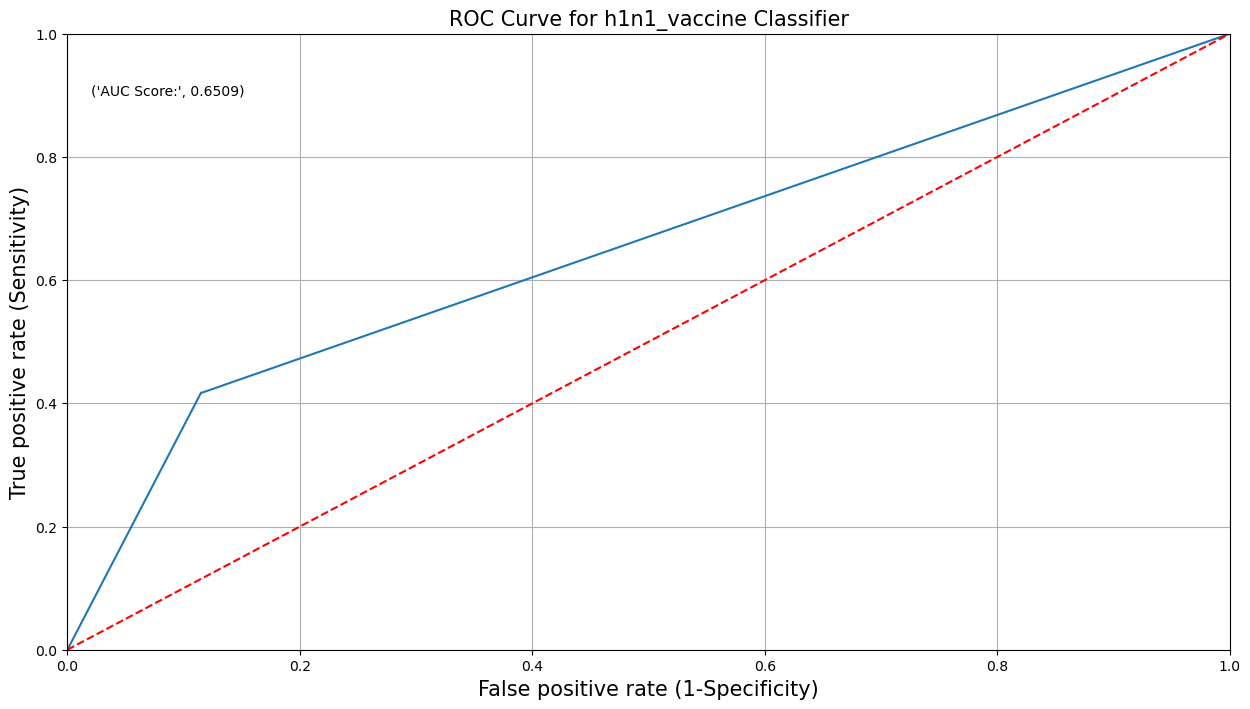

In [125]:
# call the function 'plot_roc' to plot the ROC curve
# pass the decision tree model to the function
plot_roc(decision_tree_mod)

The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

We see our classifier (decision tree) to be away from the dotted line with the AUC score 0.6509.

#### 5. Tabulate the results

In [126]:
# use the function 'update_score_card' to store the performance measures
# pass the 'Decision Tree' as model name to the function
update_score_card(model_name = 'Decision Tree')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression (MLE),0.827031,0.687459,0.299717,0.868375,0.355901,0.417439
1,Logistic Regression (SGD),0.807626,0.670038,0.300283,0.866637,0.351562,0.414710
2,Logistic Regression,0.770602,0.611160,0.195467,0.853844,0.238101,0.296201
3,Decision Tree,0.650917,0.404115,0.417280,0.811500,0.298437,0.410592


## 6.2 Prune a Decision Tree

Pruning reduces the size of the decision tree by removing the internal nodes of the tree. It decreases the complexity of the tree, and so improves the accuracy of prediction. It is useful because trees may fit the training data well, but may do a poor prediction on test data. A simpler tree often avoids over-fitting.

	
Now prune the decision tree, we start with our original data set gradually proceeding with our analysis

To prune a 'Decision Tree', we do the following:

1. Prune the decision tree
2. Plot the decision tree
3. Do predictions on the test set
4. Compute accuracy measures
5. Tabulate the results

#### 1. Prune the decision tree

We prune the decision tree by specifying the maximum depth and maximum number of leaves of the tree.

We use the unscaled features to build the tree.

In [127]:
# instantiate the 'DecisionTreeClassifier' object
# max_depth: maximum depth of the tree 
# max_leaf_nodes: maximum number of leaf nodes in the tree
# pass the 'random_state' to obtain the same samples for each time you run the code
prune = DecisionTreeClassifier(max_depth = 7, max_leaf_nodes = 25, random_state = 1)

# fit the model using fit() on train data
decision_tree_prune = prune.fit(x_train, y_train)

#### 2. Do predictions on the test set

In [128]:
# predict probabilities on the test set
# consider the probability of positive class by subsetting with '[:,1]'
y_pred_prob = decision_tree_prune.predict_proba(x_test)[:,1]

In [129]:
# predict the class labels using 'X_test'
y_pred = decision_tree_prune.predict(x_test)

#### 3. Compute accuracy measures

#### Build a confusion matrix.

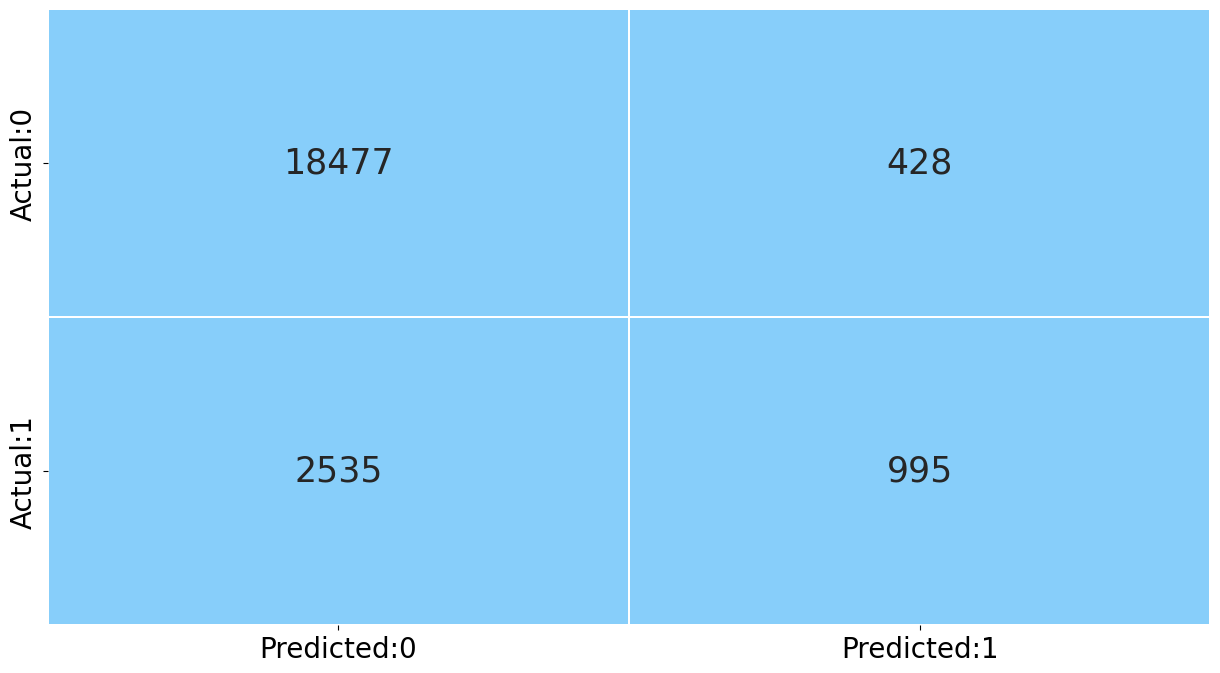

In [130]:
# call the function to plot the confusion matrix
# pass the decision tree (pruned) model to the function
plot_confusion_matrix(decision_tree_prune)

#### Calculate performance measures on the test set.

In [131]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the decision tree (pruned) model to the function
test_report = get_test_report(decision_tree_prune)

# print the performace measures
print(test_report)

              precision    recall  f1-score   support

           0       0.88      0.98      0.93     18905
           1       0.70      0.28      0.40      3530

    accuracy                           0.87     22435
   macro avg       0.79      0.63      0.66     22435
weighted avg       0.85      0.87      0.84     22435



#### Interpretation: The accuracy is 87% for this model. Also, there is significant difference between specificity and sensitivity.

In [132]:
# compute kappa score on test set
# call the function 'kappa_score'
# pass the decision tree (pruned) model to the function
kappa_value = kappa_score(decision_tree_prune)

# print the kappa value
print(kappa_value)

0.34231563106995433


#### Interpretation: As the kappa score for the Decision Tree(Prune) is 0.3423, we can say that there is low to moderate agreement between the actual and predicted values.

#### Plot the ROC curve.

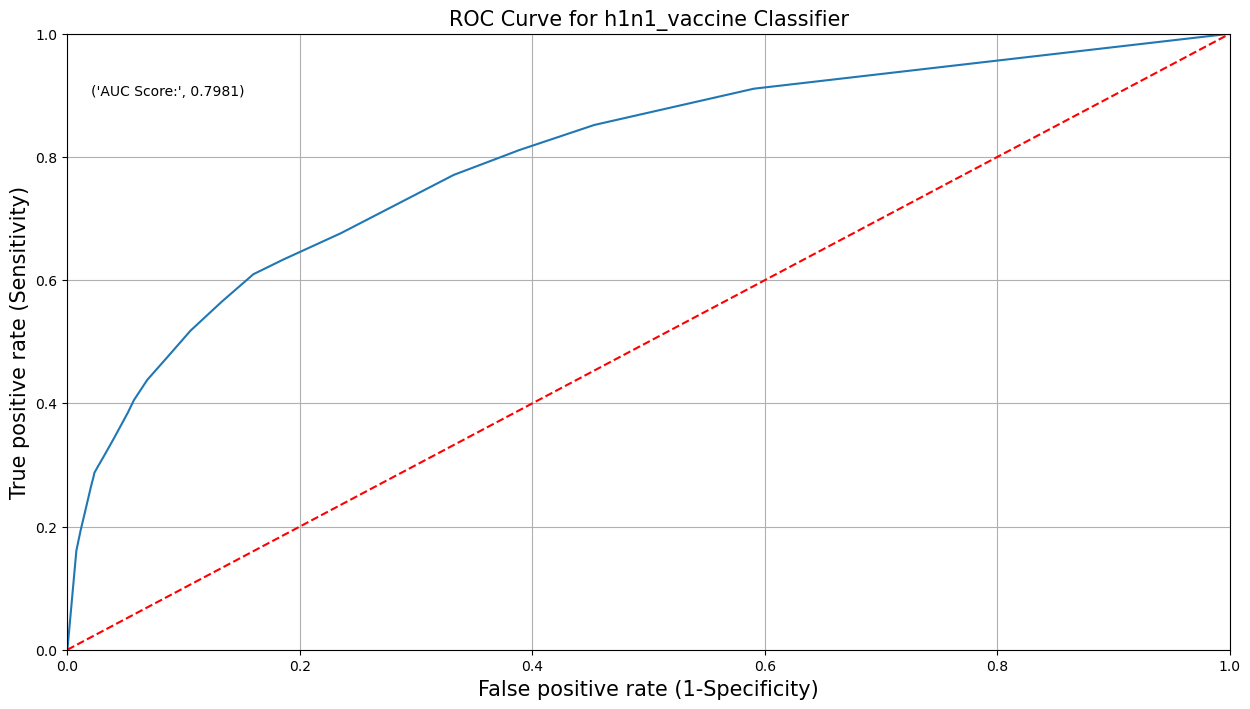

In [133]:
# call the function 'plot_roc' to plot the ROC curve
# pass the decision tree (pruned) model to the function
plot_roc(decision_tree_prune)

The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

We see our classifier (decision tree with pruning) to be away from the dotted line with the AUC score 0.7981.

#### 4. Tabulate the results

In [134]:
# use the function 'update_score_card' to store the performance measures
# pass the 'Decision Tree (Pruned)' as model name to the function
update_score_card(model_name = 'Decision Tree (Prune)')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression (MLE),0.827031,0.687459,0.299717,0.868375,0.355901,0.417439
1,Logistic Regression (SGD),0.807626,0.670038,0.300283,0.866637,0.351562,0.414710
2,Logistic Regression,0.770602,0.611160,0.195467,0.853844,0.238101,0.296201
3,Decision Tree,0.650917,0.404115,0.417280,0.811500,0.298437,0.410592
4,Decision Tree (Prune),0.798098,0.699227,0.281870,0.867930,0.342316,0.401777


## 6.3 Decision Tree (using GridSearchCV)

Now we show how a decision tree is optimized by cross-validation, which is done using the GridSearchCV() from sklearn library.

The performance of the selected hyperparameters and trained model is then measured on the test set that was not used during the model building.

#### Now we build a decision tree using the GridSearchCV. We start with our original data set gradually proceeding with our analysis

To build a Decision Tree using GridSearchCV, we do the following:
1. Use GridSearch to obtain the optimal values of hyperparameters
2. Build the model using the hyperparameters obtained in step 1
3. Plot the decision tree
4. Do predictions on the test set
5. Compute accuracy measures
6. Tabulate the results

#### 1. Use GridSearch to obtain the optimal values of hyperparameters

In [135]:
# create a dictionary with hyperparameters and its values
# pass the criteria 'entropy' and 'gini' to the parameter, 'criterion' 
# pass the list of values to 'min_samples_split' that assigns minimum number of samples to split an internal node
# pass the list of values to 'max_depth' that assigns maximum depth of the tree
# pass the list of values to 'min_samples_leaf' that assigns minimum number of samples required at the terminal/leaf node
# pass the list of values to 'max_leaf_nodes' that assigns maximum number of leaf nodes in the tree
tuned_paramaters = [{'criterion': ['gini', 'entropy'],
                     'min_samples_split': [10, 20, 30],
                     'max_depth': [3, 5, 7, 9],
                     'min_samples_leaf': [15, 20, 25, 30, 35],
                     'max_leaf_nodes': [5, 10, 15, 20, 25]}]

In [136]:
# instantiate the 'DecisionTreeClassifier' 
# pass the 'random_state' to obtain the same samples for each time you run the code
decision_tree_classification = DecisionTreeClassifier(random_state = 1)

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the decision tree classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
grid = GridSearchCV(estimator = decision_tree_classification, param_grid = tuned_paramaters, cv = 10)

# fit the model on X_train and y_train using fit()
dt_grid = grid.fit(x_train, y_train)

# get the best parameters
print('Best Parameters for decision tree classifier : ',dt_grid.best_params_, '\n')

Best Parameters for decision tree classifier :  {'criterion': 'gini', 'max_depth': 5, 'max_leaf_nodes': 25, 'min_samples_leaf': 15, 'min_samples_split': 10} 



#### 2. Build the model using the hyperparameters obtained in step 1

In [137]:
# instantiate the 'DecisionTreeClassifier'
# 'best_params_' returns the dictionary containing best parameter values and parameter name  
# 'get()' returns the value of specified parameter
# pass the 'random_state' to obtain the same samples for each time you run the code
dt_grid_model = DecisionTreeClassifier(criterion = dt_grid.best_params_.get('criterion'),
                                       max_depth = dt_grid.best_params_.get('max_depth'),
                                       max_leaf_nodes = dt_grid.best_params_.get('max_leaf_nodes'),
                                       min_samples_leaf = dt_grid.best_params_.get('min_samples_leaf'),
                                       min_samples_split = dt_grid.best_params_.get('min_samples_split'),
                                       random_state = 10)


# use fit() to fit the model on the train set
dt_grid_model = dt_grid_model.fit(x_train, y_train)

#### 3. Do predictions on the test set

In [138]:
# predict probabilities on the test set
# consider the probability of positive class by subsetting with '[:,1]'
y_pred_prob = dt_grid_model.predict_proba(x_test)[:,1]

In [139]:
# predict the class labels using 'X_test'
y_pred = dt_grid_model.predict(x_test)

#### 4. Compute accuracy measures

#### Build a confusion matrix

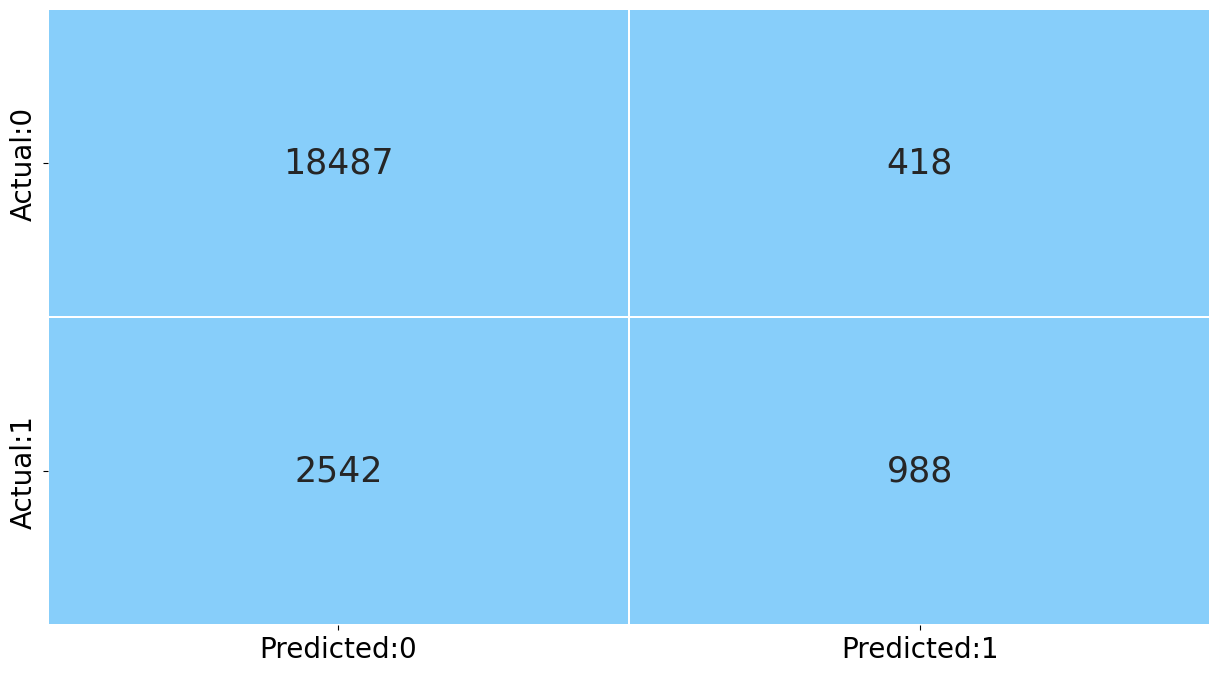

In [140]:
# call the function to plot the confusion matrix
# pass the decision tree (GridSearchCV) model to the function
plot_confusion_matrix(dt_grid_model)

#### Calculate performance measures on the test set.

In [141]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the decision tree (GridSearchCV) model to the function
test_report = get_test_report(dt_grid_model)


# print the performace measures
print(test_report)

              precision    recall  f1-score   support

           0       0.88      0.98      0.93     18905
           1       0.70      0.28      0.40      3530

    accuracy                           0.87     22435
   macro avg       0.79      0.63      0.66     22435
weighted avg       0.85      0.87      0.84     22435



#### Interpretation: The accuracy is 87% for this model. Also, there is significant difference between specificity and sensitivity.

In [142]:
# compute kappa score on test set
# call the function 'kappa_score'
# pass the decision tree (GridSearchCV) model to the function
kappa_value = kappa_score(dt_grid_model)

# print the kappa value
print(kappa_value)

0.34127809167089895


#### Interpretation: As the kappa score for the Decision Tree(GridSearchCV) is 0.3412, we can say that there is low to moderate agreement between the actual and predicted values

#### Plot the ROC curve.

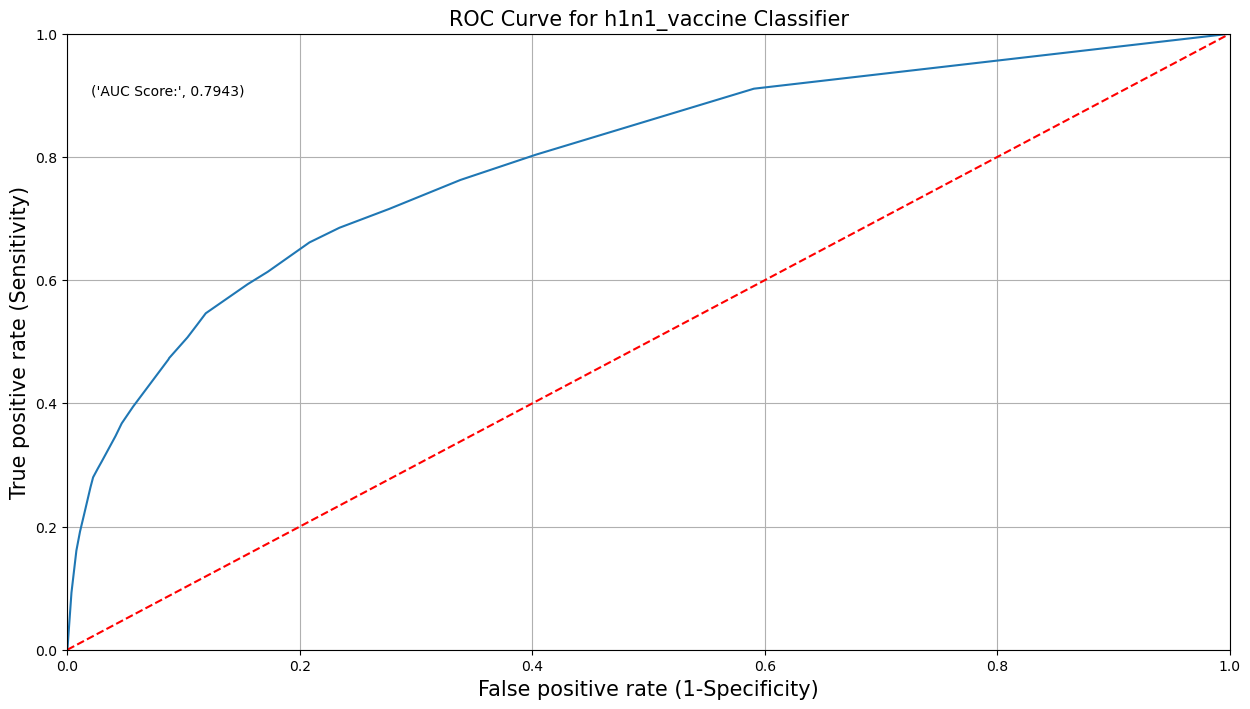

In [143]:
# call the function 'plot_roc' to plot the ROC curve
# pass the decision tree (GridSearchCV) model to the function
plot_roc(dt_grid_model)

The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

We see our classifier (decision tree with GridSearchCV) to be away from the dotted line with the AUC score 0.7943.

#### 5. Tabulate the results

In [144]:
# use the function 'update_score_card' to store the performance measures
# pass the 'Decision Tree (GridSearchCV)' as model name to the function
update_score_card(model_name = 'Decision Tree (GridSearchCV)')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression (MLE),0.827031,0.687459,0.299717,0.868375,0.355901,0.417439
1,Logistic Regression (SGD),0.807626,0.670038,0.300283,0.866637,0.351562,0.414710
2,Logistic Regression,0.770602,0.611160,0.195467,0.853844,0.238101,0.296201
3,Decision Tree,0.650917,0.404115,0.417280,0.811500,0.298437,0.410592
4,Decision Tree (Prune),0.798098,0.699227,0.281870,0.867930,0.342316,0.401777
5,Decision Tree (GridSearchCV),0.794294,0.702703,0.279887,0.868063,0.341278,0.400324


Classification model is build using Decision Tree, Decision Tree(prune) and Decision Tree(GridSearchCV), the performance of the model were evaluated using AUC score, accuracy, precision, f1-score, recall and kappa score. It have been seen that Decision Tree(prune) having 'high' AUC score, recall score, kappa score and f1-score, where as Decision Tree(GridSearchCV) has high accuracy score and precision score compare to all other features of Decision Tree, so we conclude that 'Decision Tree(GridSearchCV)' has been the best suited for predicting RainTomorrow because it has high accuracy score

In Decision Tree we have Performed multiple Models like Decision Tree, Decision Tree(Prune) and Decision Tree(GridSearchCV) in which Prune is to limit the depth of Tree and Number of leaf nodes where as GridSearchCV is used to Select the best Hyperparameters and build the model based the best values

# 7. Conclusion and Interpretation

In [145]:
# print the 'score_card' to compare all the models
score_card

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression (MLE),0.827031,0.687459,0.299717,0.868375,0.355901,0.417439
1,Logistic Regression (SGD),0.807626,0.670038,0.300283,0.866637,0.351562,0.414710
2,Logistic Regression,0.770602,0.611160,0.195467,0.853844,0.238101,0.296201
3,Decision Tree,0.650917,0.404115,0.417280,0.811500,0.298437,0.410592
4,Decision Tree (Prune),0.798098,0.699227,0.281870,0.867930,0.342316,0.401777
5,Decision Tree (GridSearchCV),0.794294,0.702703,0.279887,0.868063,0.341278,0.400324


Let us plot the performance measures of the two models in the single graph

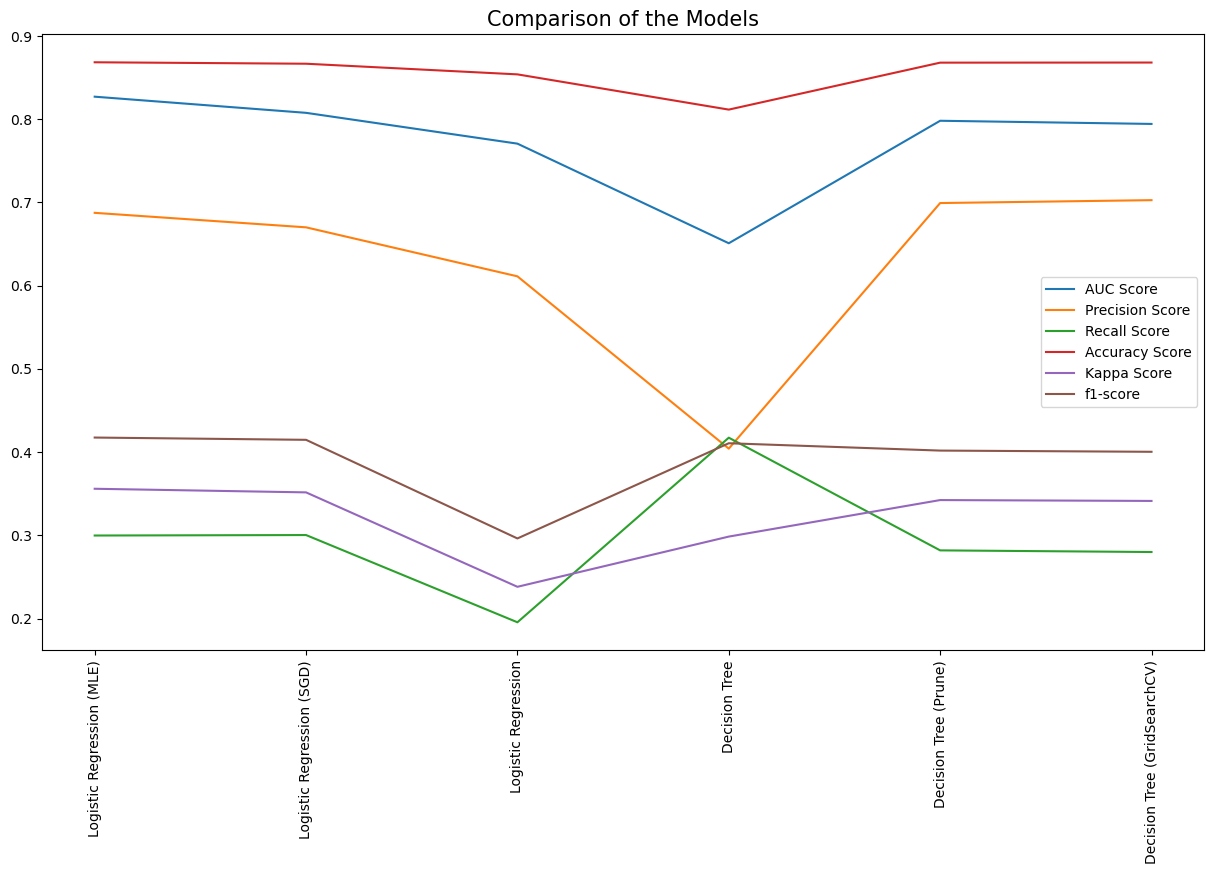

In [146]:
# plot the graph
# by default, plot() returns the line plot
score_card.plot()

# set the text size of the title
plt.title(label = 'Comparison of the Models', fontsize = 15)

# set the model names as x-ticks
# 'score_card.Model' retuns the model names
# rotate the x-axis labels vertically
plt.xticks([0,1,2,3,4,5], list(score_card.Model), rotation = 'vertical')

# display the plot
plt.show()

The supervised classification learning algorithms named in the above table have been implemented on the given dataset. The performance of the models were evaluated using AUC score, accuracy, precision, f1-score, recall, and kappa score.

From the above table the classification model after predicted using various features we can see that aacuracy score is almost same for all models except decision tree and there is some variation in AUC score, precision, recall, kappa and f1-score 

Therefore we can say that the Logistic Regression(MLE) has the highest values for most of the performance measures like AUC Score, f1-score, accuracy and kappa scores. Therefore, it can be concluded that the Logistic Regression(MLE) can be used to predict the  next-day Rain(RainTomorrow) in Australia.